# Simulator

In [1]:
import sys
sys.path.insert(0, "..")
import pandas as pd
import matplotlib.pyplot as plt
from trading_simulator import TradingSimulator, DLSimulator
from dl_solutions.dlsolutions import CryptoDLSolutions
from data_processor.data_processing import DataProcessor
from utils.crypto_utils import ModelAnalysis
from keras import optimizers
from keras.layers import LeakyReLU

Using TensorFlow backend.


## Classic

### Data preparation

In [24]:
cryptos = ['ADA', 'BTC', 'ETH', 'LTC', 'LNK']
sel = 0

In [15]:
for crypto in cryptos:
    processor = DataProcessor([crypto])
    sim = TradingSimulator(processor, crypto, strategy = [1, 2, 3, 4, 5, 6, 7], loss_allowed = 0.2, log = False, stop_loss_take_profit_strategy = 2)
    sim.simulate()

Loading... ADA
Total invested: 18100 €
Balance: 13172.688982503865 €
Orders won: 57
Orders lost: 122
Profit: 0.17528668411623566 

Loading... BTC
Total invested: 18000 €
Balance: 15374.282899246477 €
Orders won: 82
Orders lost: 91
Profit: 0.2985712721803598 

Loading... ETH
Total invested: 18900 €
Balance: 15762.628160203021 €
Orders won: 88
Orders lost: 96
Profit: 0.3049009608573027 

Loading... LTC
Total invested: 19400 €
Balance: 10078.209866880738 €
Orders won: 82
Orders lost: 108
Profit: 0.0040314364371514195 

Loading... LNK
Total invested: 14400 €
Balance: 13667.667598362794 €
Orders won: 70
Orders lost: 73
Profit: 0.254699138775194 



In [16]:
processor = DataProcessor([crypto])

Loading... LNK
Loading... LNK
Loading... LNK
Loading... LNK
Loading... LNK
Loading... LNK
Loading... LNK
Loading... LNK


### Simulations

In [27]:
for i in range(1, 8):
    for crypto in cryptos:
        processor = DataProcessor([crypto])
        sim = TradingSimulator(processor, crypto, strategy = [i], loss_allowed = 0.2, log = False, stop_loss_take_profit_strategy = 2)
        sim.simulate()
    print('##########################\n\n\n\n\n')

Loading... ADA
Total invested: 300 €
Balance: 10057.462858859024 €
Orders won: 1
Orders lost: 2
Profit: 0.19154286286341327 

Loading... BTC
Total invested: 400 €
Balance: 10310.75244449828 €
Orders won: 3
Orders lost: 1
Profit: 0.7768811112456979 

Loading... ETH
Total invested: 400 €
Balance: 10097.541136767813 €
Orders won: 2
Orders lost: 2
Profit: 0.2438528419195336 

Loading... LTC
Total invested: 500 €
Balance: 9957.386864457305 €
Orders won: 2
Orders lost: 3
Profit: -0.08522627108539019 

Loading... LNK
Total invested: 200 €
Balance: 10001.092886477461 €
Orders won: 1
Orders lost: 1
Profit: 0.00546443238730717 

##########################





Loading... ADA
Total invested: 2400 €
Balance: 10163.384828475693 €
Orders won: 6
Orders lost: 18
Profit: 0.06807701186487217 

Loading... BTC
Total invested: 2000 €
Balance: 10976.89511478925 €
Orders won: 12
Orders lost: 7
Profit: 0.4884475573946247 

Loading... ETH
Total invested: 2500 €
Balance: 10513.913693501721 €
Orders won: 10
Orde

ZeroDivisionError: division by zero

## DL Solution

In [2]:
model_analysis = ModelAnalysis()

def execute_test(split_size = -1):
    '''
    Creates artificial test process to validate different hyperparameters
    '''
    sim = DLSimulator(crypto, prev_periods, pred_periods, columns, target,
    norm_strat, model_sel, layers, neurons, batch_size, epochs, 
    activation, loss, metrics, optimizer, initial_learning_rate, callbacks)

    df_train = sim.get_df().iloc[:split_size]
    if split_size == -1:
        df_test = sim.get_df().iloc[split_size:]
    else:
        df_test = sim.get_df().iloc[split_size:split_size+1]
    
    display(df_train)
    display(df_test)

    sim.train_model(df_train)
    
    pred = sim.predict(pd.DataFrame(df_test))
    print('Predictions', pred)
    h = sim.get_history()
    model_analysis.draw_history(h)

### Data preparation

Estos son los parametros ademas de otros pocos añadidos ad hoc al modelo (dropout). Estos parametros iran cambiando a lo largo del analisis.

En este notebook no aparece todo el analisis por ser demasiado extenso (analisis por dias de la semana, otras metricas, cpas, cambios en la output layer, uso de previous y pred periods...)

In [3]:
crypto = 'ETH'

#### PERIODS ####
prev_periods = 20
pred_periods = 20


#### COLUMNS ####
columns_1 = ['RSI', 'close']

#### HYPERPARAMETERS ####
layers = 4
neurons = [25, 25, 25, 25, 25] # El primer valor son las neuronas de la base layer
batch_size = 64
epochs = 100
#activations = ['relu', 'sigmoid', 'softmax']
#losses = ['mse', 'binary_crossentropy', 'categorical_crossentropy']
#metrics_opt = ['mse', 'accuracy']
activation = 'relu'
loss = 'mse'
metrics = ['mse']
optimizer = 'adam'
initial_learning_rate = 0.01
callbacks = ['mc', 'es']

### DL parameters and training

Creation of different strategies:

- Based on result
- Based on close/indicators normalized
- Try with different close distances
- Multioutput
- Based on multiple operation (softmax)

#### LSTM 

In [4]:
model_sel = 0

##### One line feature

Usaremos solo una característica como objetivo de predicción

Análisis por periodos fijos:

Analizaremos el impacot de los heprparámetros para posteriormente buscar los valores optimos de periodos previos y a predecir

Fijaremos los periodos usados y a predecir en 20



Cambiaremos lo siguiente en cuanto a hiperparámetros y modelo sobre dos metricas usadas: una métrica normalizada como RSI y otro sin normalizar como close:

- Layers
- Neurons
- Epochs
- Tipo de normalización
- Activacion y función de pérdidas

Probemos primero diferentes tipos de noramalización con la siguientes caracterisiticas del modelo:

Normalizacion:
- 0: Normalizar sobre todo el dataset
- 1: Min Max Scaller (No valida al ser una sola line de test y por tanto normalizar con respecto a nada)
- 2: Min Max por columnas sobre todo el dataset
- 3: Ln
- 4: Sin normalización


In [5]:
target = 'close'

In [6]:
columns = columns_1
num_features = len(columns)

Normalizacion: 0
Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,close_19,RSI_19,close_18,RSI_18,close_17,RSI_17,close_16,RSI_16,close_15,RSI_15,...,RSI_4,close_3,RSI_3,close_2,RSI_2,close_1,RSI_1,close_0,RSI_0,close
157,754.99,51.874455,855.28,64.086633,934.03,70.431522,940.00,70.851945,959.30,72.226781,...,48.819684,1000.00,48.819684,994.00,48.493851,1032.50,50.764615,1152.75,57.122992,877.00
158,855.28,64.086633,934.03,70.431522,940.00,70.851945,959.30,72.226781,1004.11,75.156684,...,48.819684,994.00,48.493851,1032.50,50.764615,1152.75,57.122992,1049.00,51.002981,851.15
159,934.03,70.431522,940.00,70.851945,959.30,72.226781,1004.11,75.156684,1123.09,80.914056,...,48.493851,1032.50,50.764615,1152.75,57.122992,1049.00,51.002981,993.00,48.012894,808.99
160,940.00,70.851945,959.30,72.226781,1004.11,75.156684,1123.09,80.914056,1133.18,81.309636,...,50.764615,1152.75,57.122992,1049.00,51.002981,993.00,48.012894,980.00,47.319361,866.66
161,959.30,72.226781,1004.11,75.156684,1123.09,80.914056,1133.18,81.309636,1291.00,86.146268,...,57.122992,1049.00,51.002981,993.00,48.012894,980.00,47.319361,1061.00,51.974254,841.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4287.80,47.095555,3996.90,39.023233,4294.76,48.716109,4412.17,51.957920,4258.31,47.702403,...,53.835840,4215.73,46.826530,4117.25,44.735958,4196.44,46.793026,4347.59,50.574650,4063.56
1574,3996.90,39.023233,4294.76,48.716109,4412.17,51.957920,4258.31,47.702403,4085.97,43.413283,...,46.826530,4117.25,44.735958,4196.44,46.793026,4347.59,50.574650,4306.40,49.541304,4037.23
1575,4294.76,48.716109,4412.17,51.957920,4258.31,47.702403,4085.97,43.413283,4339.44,50.467423,...,44.735958,4196.44,46.793026,4347.59,50.574650,4306.40,49.541304,4436.91,52.829940,3792.75
1576,4412.17,51.957920,4258.31,47.702403,4085.97,43.413283,4339.44,50.467423,4269.36,48.661227,...,46.793026,4347.59,50.574650,4306.40,49.541304,4436.91,52.829940,4105.64,44.841174,3630.19


,close_19,RSI_19,close_18,RSI_18,close_17,RSI_17,close_16,RSI_16,close_15,RSI_15,...,RSI_4,close_3,RSI_3,close_2,RSI_2,close_1,RSI_1,close_0,RSI_0,close
1578,4085.97,43.413283,4339.44,50.467423,4269.36,48.661227,4524.85,54.986266,4041.2,43.948042,...,49.541304,4436.91,52.82994,4105.64,44.841174,3897.94,40.686916,4089.37,45.681743,3725.46


Input shape: (1421, 1, 40) (1421, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 25)             6600      
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 25)             5100      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 25)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 25)             5100      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 25)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 25)             5100      
_________________________________________________________________
dropout_3 (Dropou

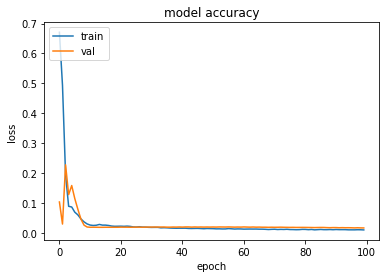

In [7]:
norm_strat = 0
print('Normalizacion:', norm_strat)
execute_test()

Normalizacion: 2
Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,close_19,RSI_19,close_18,RSI_18,close_17,RSI_17,close_16,RSI_16,close_15,RSI_15,...,RSI_4,close_3,RSI_3,close_2,RSI_2,close_1,RSI_1,close_0,RSI_0,close
157,754.99,51.874455,855.28,64.086633,934.03,70.431522,940.00,70.851945,959.30,72.226781,...,48.819684,1000.00,48.819684,994.00,48.493851,1032.50,50.764615,1152.75,57.122992,877.00
158,855.28,64.086633,934.03,70.431522,940.00,70.851945,959.30,72.226781,1004.11,75.156684,...,48.819684,994.00,48.493851,1032.50,50.764615,1152.75,57.122992,1049.00,51.002981,851.15
159,934.03,70.431522,940.00,70.851945,959.30,72.226781,1004.11,75.156684,1123.09,80.914056,...,48.493851,1032.50,50.764615,1152.75,57.122992,1049.00,51.002981,993.00,48.012894,808.99
160,940.00,70.851945,959.30,72.226781,1004.11,75.156684,1123.09,80.914056,1133.18,81.309636,...,50.764615,1152.75,57.122992,1049.00,51.002981,993.00,48.012894,980.00,47.319361,866.66
161,959.30,72.226781,1004.11,75.156684,1123.09,80.914056,1133.18,81.309636,1291.00,86.146268,...,57.122992,1049.00,51.002981,993.00,48.012894,980.00,47.319361,1061.00,51.974254,841.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4287.80,47.095555,3996.90,39.023233,4294.76,48.716109,4412.17,51.957920,4258.31,47.702403,...,53.835840,4215.73,46.826530,4117.25,44.735958,4196.44,46.793026,4347.59,50.574650,4063.56
1574,3996.90,39.023233,4294.76,48.716109,4412.17,51.957920,4258.31,47.702403,4085.97,43.413283,...,46.826530,4117.25,44.735958,4196.44,46.793026,4347.59,50.574650,4306.40,49.541304,4037.23
1575,4294.76,48.716109,4412.17,51.957920,4258.31,47.702403,4085.97,43.413283,4339.44,50.467423,...,44.735958,4196.44,46.793026,4347.59,50.574650,4306.40,49.541304,4436.91,52.829940,3792.75
1576,4412.17,51.957920,4258.31,47.702403,4085.97,43.413283,4339.44,50.467423,4269.36,48.661227,...,46.793026,4347.59,50.574650,4306.40,49.541304,4436.91,52.829940,4105.64,44.841174,3630.19


,close_19,RSI_19,close_18,RSI_18,close_17,RSI_17,close_16,RSI_16,close_15,RSI_15,...,RSI_4,close_3,RSI_3,close_2,RSI_2,close_1,RSI_1,close_0,RSI_0,close
1578,4085.97,43.413283,4339.44,50.467423,4269.36,48.661227,4524.85,54.986266,4041.2,43.948042,...,49.541304,4436.91,52.82994,4105.64,44.841174,3897.94,40.686916,4089.37,45.681743,3725.46


Input shape: (1421, 1, 40) (1421, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1, 25)             6600      
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 25)             5100      
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 25)             0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 1, 25)             5100      
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 25)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 1, 25)             5100      
_________________________________________________________________
dropout_7 (Dropou

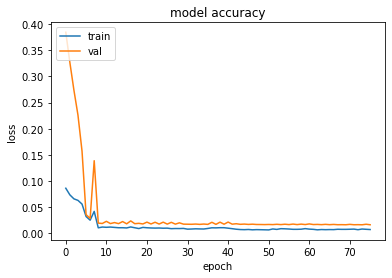

In [8]:
norm_strat = 2
print('Normalizacion:', norm_strat)
execute_test()

Normalizacion: 3
Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,close_19,RSI_19,close_18,RSI_18,close_17,RSI_17,close_16,RSI_16,close_15,RSI_15,...,RSI_4,close_3,RSI_3,close_2,RSI_2,close_1,RSI_1,close_0,RSI_0,close
157,754.99,51.874455,855.28,64.086633,934.03,70.431522,940.00,70.851945,959.30,72.226781,...,48.819684,1000.00,48.819684,994.00,48.493851,1032.50,50.764615,1152.75,57.122992,877.00
158,855.28,64.086633,934.03,70.431522,940.00,70.851945,959.30,72.226781,1004.11,75.156684,...,48.819684,994.00,48.493851,1032.50,50.764615,1152.75,57.122992,1049.00,51.002981,851.15
159,934.03,70.431522,940.00,70.851945,959.30,72.226781,1004.11,75.156684,1123.09,80.914056,...,48.493851,1032.50,50.764615,1152.75,57.122992,1049.00,51.002981,993.00,48.012894,808.99
160,940.00,70.851945,959.30,72.226781,1004.11,75.156684,1123.09,80.914056,1133.18,81.309636,...,50.764615,1152.75,57.122992,1049.00,51.002981,993.00,48.012894,980.00,47.319361,866.66
161,959.30,72.226781,1004.11,75.156684,1123.09,80.914056,1133.18,81.309636,1291.00,86.146268,...,57.122992,1049.00,51.002981,993.00,48.012894,980.00,47.319361,1061.00,51.974254,841.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4287.80,47.095555,3996.90,39.023233,4294.76,48.716109,4412.17,51.957920,4258.31,47.702403,...,53.835840,4215.73,46.826530,4117.25,44.735958,4196.44,46.793026,4347.59,50.574650,4063.56
1574,3996.90,39.023233,4294.76,48.716109,4412.17,51.957920,4258.31,47.702403,4085.97,43.413283,...,46.826530,4117.25,44.735958,4196.44,46.793026,4347.59,50.574650,4306.40,49.541304,4037.23
1575,4294.76,48.716109,4412.17,51.957920,4258.31,47.702403,4085.97,43.413283,4339.44,50.467423,...,44.735958,4196.44,46.793026,4347.59,50.574650,4306.40,49.541304,4436.91,52.829940,3792.75
1576,4412.17,51.957920,4258.31,47.702403,4085.97,43.413283,4339.44,50.467423,4269.36,48.661227,...,46.793026,4347.59,50.574650,4306.40,49.541304,4436.91,52.829940,4105.64,44.841174,3630.19


,close_19,RSI_19,close_18,RSI_18,close_17,RSI_17,close_16,RSI_16,close_15,RSI_15,...,RSI_4,close_3,RSI_3,close_2,RSI_2,close_1,RSI_1,close_0,RSI_0,close
1578,4085.97,43.413283,4339.44,50.467423,4269.36,48.661227,4524.85,54.986266,4041.2,43.948042,...,49.541304,4436.91,52.82994,4105.64,44.841174,3897.94,40.686916,4089.37,45.681743,3725.46


Input shape: (1421, 1, 40) (1421, 1)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 1, 25)             6600      
_________________________________________________________________
lstm_12 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 25)             0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_10 (Dropout)         (None, 1, 25)             0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_11 (Dropo

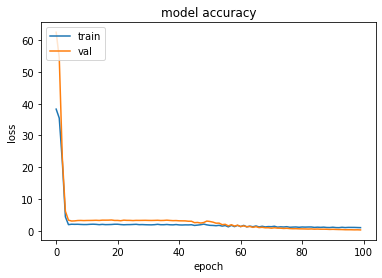

In [9]:
norm_strat = 3
print('Normalizacion:', norm_strat)
execute_test()

Normalizacion: 4
Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,close_19,RSI_19,close_18,RSI_18,close_17,RSI_17,close_16,RSI_16,close_15,RSI_15,...,RSI_4,close_3,RSI_3,close_2,RSI_2,close_1,RSI_1,close_0,RSI_0,close
157,754.99,51.874455,855.28,64.086633,934.03,70.431522,940.00,70.851945,959.30,72.226781,...,48.819684,1000.00,48.819684,994.00,48.493851,1032.50,50.764615,1152.75,57.122992,877.00
158,855.28,64.086633,934.03,70.431522,940.00,70.851945,959.30,72.226781,1004.11,75.156684,...,48.819684,994.00,48.493851,1032.50,50.764615,1152.75,57.122992,1049.00,51.002981,851.15
159,934.03,70.431522,940.00,70.851945,959.30,72.226781,1004.11,75.156684,1123.09,80.914056,...,48.493851,1032.50,50.764615,1152.75,57.122992,1049.00,51.002981,993.00,48.012894,808.99
160,940.00,70.851945,959.30,72.226781,1004.11,75.156684,1123.09,80.914056,1133.18,81.309636,...,50.764615,1152.75,57.122992,1049.00,51.002981,993.00,48.012894,980.00,47.319361,866.66
161,959.30,72.226781,1004.11,75.156684,1123.09,80.914056,1133.18,81.309636,1291.00,86.146268,...,57.122992,1049.00,51.002981,993.00,48.012894,980.00,47.319361,1061.00,51.974254,841.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4287.80,47.095555,3996.90,39.023233,4294.76,48.716109,4412.17,51.957920,4258.31,47.702403,...,53.835840,4215.73,46.826530,4117.25,44.735958,4196.44,46.793026,4347.59,50.574650,4063.56
1574,3996.90,39.023233,4294.76,48.716109,4412.17,51.957920,4258.31,47.702403,4085.97,43.413283,...,46.826530,4117.25,44.735958,4196.44,46.793026,4347.59,50.574650,4306.40,49.541304,4037.23
1575,4294.76,48.716109,4412.17,51.957920,4258.31,47.702403,4085.97,43.413283,4339.44,50.467423,...,44.735958,4196.44,46.793026,4347.59,50.574650,4306.40,49.541304,4436.91,52.829940,3792.75
1576,4412.17,51.957920,4258.31,47.702403,4085.97,43.413283,4339.44,50.467423,4269.36,48.661227,...,46.793026,4347.59,50.574650,4306.40,49.541304,4436.91,52.829940,4105.64,44.841174,3630.19


,close_19,RSI_19,close_18,RSI_18,close_17,RSI_17,close_16,RSI_16,close_15,RSI_15,...,RSI_4,close_3,RSI_3,close_2,RSI_2,close_1,RSI_1,close_0,RSI_0,close
1578,4085.97,43.413283,4339.44,50.467423,4269.36,48.661227,4524.85,54.986266,4041.2,43.948042,...,49.541304,4436.91,52.82994,4105.64,44.841174,3897.94,40.686916,4089.37,45.681743,3725.46


Input shape: (1421, 1, 40) (1421, 1)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 1, 25)             6600      
_________________________________________________________________
lstm_17 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 25)             0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_14 (Dropout)         (None, 1, 25)             0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_15 (Dropo

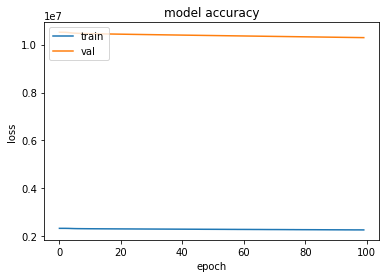

In [10]:
norm_strat = 4
print('Normalizacion:', norm_strat)
execute_test()

Mejor metodo de normalizacion es el 2

Nos centramos ahora en la seleccion de columnas. Queremos la mayor información posible. Ahora en vez de selccionar solo una columna como target, seleccionaremos varias para proveer a nuestro futuro bucle de prediccion e inversion de mas información.

Para esto, lo mejor será tener la información del precio (suavizada o sin suavizar con SMA o EMA) y algun indicador del momento como RSI, ADX o SO.

##### Multiples features

Usaremos multiples características como objetivos de predicción. De esta manera nuestro modelo final proveera mayor información.

Usaremos indicadores ya normalizados entre ciertos valores como RSI, ADX y SO. Entre estos tres ADX suele tener mejores capacidades a la hora de indicar la fuerza de la tendencia. Utilizaremos ADX combinado con algun valor del precio:
- close
- SMA
- EMA

Esta vez cambiaremos entre disferentes monedas para dar más validez al resultado final

In [13]:
cryptos = ['ETH', 'ADA', 'BTC', 'LNK', 'LTC']

In [7]:
columns_2 = ['ADX', 'close']
columns_3 = ['ADX', 'EMA_50']
columns_4 = ['ADX', 'SMA 50']
columns_5 = ['ADX', 'EMA_200']
columns_6 = ['ADX', 'SMA 200']

target = 'close'
norm_strat = 2

close

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,close_19,ADX_19,close_18,ADX_18,close_17,ADX_17,close_16,ADX_16,close_15,ADX_15,...,ADX_4,close_3,ADX_3,close_2,ADX_2,close_1,ADX_1,close_0,ADX_0,close
157,754.99,41.418230,855.28,36.212628,934.03,24.312204,940.00,21.025032,959.30,21.223914,...,28.656861,1000.00,27.861915,994.00,27.314258,1032.50,26.829022,1152.75,26.295579,877.00
158,855.28,36.212628,934.03,24.312204,940.00,21.025032,959.30,21.223914,1004.11,22.305116,...,27.861915,994.00,27.314258,1032.50,26.829022,1152.75,26.295579,1049.00,25.001883,851.15
159,934.03,24.312204,940.00,21.025032,959.30,21.223914,1004.11,22.305116,1123.09,23.246794,...,27.314258,1032.50,26.829022,1152.75,26.295579,1049.00,25.001883,993.00,24.131656,808.99
160,940.00,21.025032,959.30,21.223914,1004.11,22.305116,1123.09,23.246794,1133.18,25.900560,...,26.829022,1152.75,26.295579,1049.00,25.001883,993.00,24.131656,980.00,23.956457,866.66
161,959.30,21.223914,1004.11,22.305116,1123.09,23.246794,1133.18,25.900560,1291.00,26.950869,...,26.295579,1049.00,25.001883,993.00,24.131656,980.00,23.956457,1061.00,23.763680,841.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4287.80,19.071649,3996.90,19.441324,4294.76,19.895549,4412.17,20.260773,4258.31,19.858133,...,17.630929,4215.73,16.807307,4117.25,16.765313,4196.44,17.981035,4347.59,19.049911,4063.56
1574,3996.90,19.441324,4294.76,19.895549,4412.17,20.260773,4258.31,19.858133,4085.97,19.464946,...,16.807307,4117.25,16.765313,4196.44,17.981035,4347.59,19.049911,4306.40,19.747824,4037.23
1575,4294.76,19.895549,4412.17,20.260773,4258.31,19.858133,4085.97,19.464946,4339.44,19.925177,...,16.765313,4196.44,17.981035,4347.59,19.049911,4306.40,19.747824,4436.91,20.202159,3792.75
1576,4412.17,20.260773,4258.31,19.858133,4085.97,19.464946,4339.44,19.925177,4269.36,19.969782,...,17.981035,4347.59,19.049911,4306.40,19.747824,4436.91,20.202159,4105.64,20.614088,3630.19


,close_19,ADX_19,close_18,ADX_18,close_17,ADX_17,close_16,ADX_16,close_15,ADX_15,...,ADX_4,close_3,ADX_3,close_2,ADX_2,close_1,ADX_1,close_0,ADX_0,close
1578,4085.97,19.464946,4339.44,19.925177,4269.36,19.969782,4524.85,19.934622,4041.2,19.004087,...,19.747824,4436.91,20.202159,4105.64,20.614088,3897.94,21.222026,4089.37,22.210426,3725.46


Input shape: (1421, 1, 40) (1421, 1)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 1, 25)             6600      
_________________________________________________________________
lstm_42 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_33 (Dropout)         (None, 1, 25)             0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_34 (Dropout)         (None, 1, 25)             0         
_________________________________________________________________
lstm_44 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_35 (Dropo

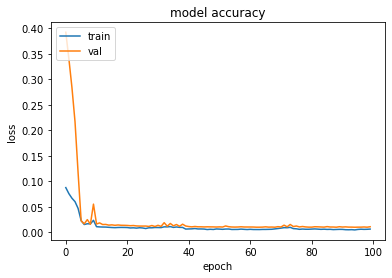

In [16]:
target = 'close'

columns = columns_2
num_features = len(columns)
crypto = cryptos[0]
execute_test()

EMA 50

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,EMA_50_19,ADX_19,EMA_50_18,ADX_18,EMA_50_17,ADX_17,EMA_50_16,ADX_16,EMA_50_15,ADX_15,...,ADX_4,EMA_50_3,ADX_3,EMA_50_2,ADX_2,EMA_50_1,ADX_1,EMA_50_0,ADX_0,EMA_50
157,757.484690,41.418230,761.319800,36.212628,768.092749,24.312204,774.834210,21.025032,782.068162,21.223914,...,28.656861,935.027584,27.861915,937.340228,27.314258,941.071984,26.829022,949.373082,26.295579,952.866927
158,761.319800,36.212628,768.092749,24.312204,774.834210,21.025032,782.068162,21.223914,790.775685,22.305116,...,27.861915,937.340228,27.314258,941.071984,26.829022,949.373082,26.295579,953.280020,25.001883,948.878028
159,768.092749,24.312204,774.834210,21.025032,782.068162,21.223914,790.775685,22.305116,803.807619,23.246794,...,27.314258,941.071984,26.829022,949.373082,26.295579,953.280020,25.001883,954.837667,24.131656,943.392223
160,774.834210,21.025032,782.068162,21.223914,790.775685,22.305116,803.807619,23.246794,816.724183,25.900560,...,26.829022,949.373082,26.295579,953.280020,25.001883,954.837667,24.131656,955.824425,23.956457,940.383116
161,782.068162,21.223914,790.775685,22.305116,803.807619,23.246794,816.724183,25.900560,835.323235,26.950869,...,26.295579,953.280020,25.001883,954.837667,24.131656,955.824425,23.956457,959.948957,23.763680,936.508092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4119.107937,19.071649,4114.315469,19.441324,4121.391725,19.895549,4132.794794,20.260773,4137.716959,19.858133,...,17.630929,4217.844136,16.807307,4213.899268,16.765313,4213.214591,17.981035,4218.484215,19.049911,4110.703230
1574,4114.315469,19.441324,4121.391725,19.895549,4132.794794,20.260773,4137.716959,19.858133,4135.687667,19.464946,...,16.807307,4213.899268,16.765313,4213.214591,17.981035,4218.484215,19.049911,4221.931893,19.747824,4107.821927
1575,4121.391725,19.895549,4132.794794,20.260773,4137.716959,19.858133,4135.687667,19.464946,4143.677954,19.925177,...,16.765313,4213.214591,17.981035,4218.484215,19.049911,4221.931893,19.747824,4230.362407,20.202159,4095.466165
1576,4132.794794,20.260773,4137.716959,19.858133,4135.687667,19.464946,4143.677954,19.925177,4148.606662,19.969782,...,17.981035,4218.484215,19.049911,4221.931893,19.747824,4230.362407,20.202159,4225.471332,20.614088,4077.220041


,EMA_50_19,ADX_19,EMA_50_18,ADX_18,EMA_50_17,ADX_17,EMA_50_16,ADX_16,EMA_50_15,ADX_15,...,ADX_4,EMA_50_3,ADX_3,EMA_50_2,ADX_2,EMA_50_1,ADX_1,EMA_50_0,ADX_0,EMA_50
1578,4135.687667,19.464946,4143.677954,19.925177,4148.606662,19.969782,4163.361303,19.934622,4158.570663,19.004087,...,19.747824,4230.362407,20.202159,4225.471332,20.614088,4212.626966,21.222026,4207.793359,22.210426,4049.561976


Input shape: (1421, 1, 40) (1421, 1)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_46 (LSTM)               (None, 1, 25)             6600      
_________________________________________________________________
lstm_47 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_37 (Dropout)         (None, 1, 25)             0         
_________________________________________________________________
lstm_48 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_38 (Dropout)         (None, 1, 25)             0         
_________________________________________________________________
lstm_49 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_39 (Drop

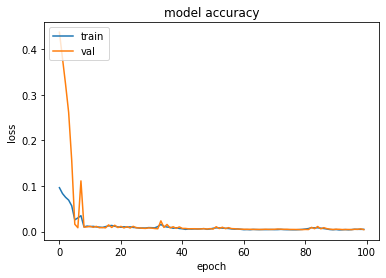

In [17]:
target = 'EMA_50'

columns = columns_3
num_features = len(columns)
crypto = cryptos[0]
execute_test()

SMA 50

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,SMA 50_19,ADX_19,SMA 50_18,ADX_18,SMA 50_17,ADX_17,SMA 50_16,ADX_16,SMA 50_15,ADX_15,...,ADX_4,SMA 50_3,ADX_3,SMA 50_2,ADX_2,SMA 50_1,ADX_1,SMA 50_0,ADX_0,SMA 50
192,967.5256,18.764118,967.4306,20.493217,966.5506,22.303508,966.3796,23.454945,968.2714,24.441875,...,17.797676,1009.9178,17.470375,1007.2670,17.748928,1005.4990,18.222022,1002.9918,18.477033,859.0894
193,967.4306,20.493217,966.5506,22.303508,966.3796,23.454945,968.2714,24.441875,972.5750,24.385214,...,17.470375,1007.2670,17.748928,1005.4990,18.222022,1002.9918,18.477033,999.7334,18.713222,849.0078
194,966.5506,22.303508,966.3796,23.454945,968.2714,24.441875,972.5750,24.385214,975.9480,24.078679,...,17.748928,1005.4990,18.222022,1002.9918,18.477033,999.7334,18.713222,994.6312,18.890864,837.3680
195,966.3796,23.454945,968.2714,24.441875,972.5750,24.385214,975.9480,24.078679,980.1212,23.976865,...,18.222022,1002.9918,18.477033,999.7334,18.713222,994.6312,18.890864,989.3698,18.501906,823.4664
196,968.2714,24.441875,972.5750,24.385214,975.9480,24.078679,980.1212,23.976865,982.6536,23.677467,...,18.477033,999.7334,18.713222,994.6312,18.890864,989.3698,18.501906,980.6198,17.904245,811.0662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4034.8430,19.071649,4057.7720,19.441324,4083.6550,19.895549,4105.7002,20.260773,4123.1112,19.858133,...,17.630929,4314.5094,16.807307,4319.4746,16.765313,4326.8042,17.981035,4336.8190,19.049911,4255.1132
1574,4057.7720,19.441324,4083.6550,19.895549,4105.7002,20.260773,4123.1112,19.858133,4136.4760,19.464946,...,16.807307,4319.4746,16.765313,4326.8042,17.981035,4336.8190,19.049911,4348.0478,19.747824,4243.6060
1575,4083.6550,19.895549,4105.7002,20.260773,4123.1112,19.858133,4136.4760,19.464946,4155.5386,19.925177,...,16.765313,4326.8042,17.981035,4336.8190,19.049911,4348.0478,19.747824,4359.2454,20.202159,4223.3014
1576,4105.7002,20.260773,4123.1112,19.858133,4136.4760,19.464946,4155.5386,19.925177,4170.6204,19.969782,...,17.981035,4336.8190,19.049911,4348.0478,19.747824,4359.2454,20.202159,4358.1352,20.614088,4201.2586


,SMA 50_19,ADX_19,SMA 50_18,ADX_18,SMA 50_17,ADX_17,SMA 50_16,ADX_16,SMA 50_15,ADX_15,...,ADX_4,SMA 50_3,ADX_3,SMA 50_2,ADX_2,SMA 50_1,ADX_1,SMA 50_0,ADX_0,SMA 50
1578,4136.476,19.464946,4155.5386,19.925177,4170.6204,19.969782,4189.6196,19.934622,4198.6942,19.004087,...,19.747824,4359.2454,20.202159,4358.1352,20.614088,4355.0342,21.222026,4357.3776,22.210426,4162.9976


Input shape: (1386, 1, 40) (1386, 1)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_51 (LSTM)               (None, 1, 25)             6600      
_________________________________________________________________
lstm_52 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_41 (Dropout)         (None, 1, 25)             0         
_________________________________________________________________
lstm_53 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_42 (Dropout)         (None, 1, 25)             0         
_________________________________________________________________
lstm_54 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_43 (Drop

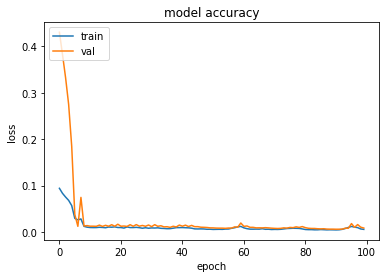

In [18]:
target = 'SMA 50'

columns = columns_4
num_features = len(columns)
crypto = cryptos[0]
execute_test()

EMA 200

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,EMA_200_19,ADX_19,EMA_200_18,ADX_18,EMA_200_17,ADX_17,EMA_200_16,ADX_16,EMA_200_15,ADX_15,...,ADX_4,EMA_200_3,ADX_3,EMA_200_2,ADX_2,EMA_200_1,ADX_1,EMA_200_0,ADX_0,EMA_200
157,775.993770,41.418230,776.782688,36.212628,778.347338,24.312204,779.955822,21.025032,781.740341,21.223914,...,28.656861,827.149747,27.861915,828.809949,27.314258,830.836715,26.829022,834.039833,26.295579,859.418186
158,776.782688,36.212628,778.347338,24.312204,779.955822,21.025032,781.740341,21.223914,783.952975,22.305116,...,27.861915,828.809949,27.314258,830.836715,26.829022,834.039833,26.295579,836.178740,25.001883,859.335915
159,778.347338,24.312204,779.955822,21.025032,781.740341,21.223914,783.952975,22.305116,787.327472,23.246794,...,27.314258,830.836715,26.829022,834.039833,26.295579,836.178740,25.001883,837.739150,24.131656,858.834961
160,779.955822,21.025032,781.740341,21.223914,783.952975,22.305116,787.327472,23.246794,790.768791,25.900560,...,26.829022,834.039833,26.295579,836.178740,25.001883,837.739150,24.131656,839.154681,23.956457,858.912822
161,781.740341,21.223914,783.952975,22.305116,787.327472,23.246794,790.768791,25.900560,795.746216,26.950869,...,26.295579,836.178740,25.001883,837.739150,24.131656,839.154681,23.956457,841.362097,23.763680,858.740257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,3170.179794,19.071649,3178.405866,19.441324,3189.513867,19.895549,3201.679600,20.260773,3212.193335,19.858133,...,17.630929,3339.640830,16.807307,3347.378235,16.765313,3355.826611,17.981035,3365.694903,19.049911,3485.692671
1574,3178.405866,19.441324,3189.513867,19.895549,3201.679600,20.260773,3212.193335,19.858133,3220.887630,19.464946,...,16.807307,3347.378235,16.765313,3355.826611,17.981035,3365.694903,19.049911,3375.055153,19.747824,3491.180605
1575,3189.513867,19.895549,3201.679600,20.260773,3212.193335,19.858133,3220.887630,19.464946,3232.017505,19.925177,...,16.765313,3355.826611,17.981035,3365.694903,19.049911,3375.055153,19.747824,3385.620873,20.202159,3494.181295
1576,3201.679600,20.260773,3212.193335,19.858133,3220.887630,19.464946,3232.017505,19.925177,3242.339320,19.969782,...,17.981035,3365.694903,19.049911,3375.055153,19.747824,3385.620873,20.202159,3392.785242,20.614088,3495.534616


,EMA_200_19,ADX_19,EMA_200_18,ADX_18,EMA_200_17,ADX_17,EMA_200_16,ADX_16,EMA_200_15,ADX_15,...,ADX_4,EMA_200_3,ADX_3,EMA_200_2,ADX_2,EMA_200_1,ADX_1,EMA_200_0,ADX_0,EMA_200
1578,3220.88763,19.464946,3232.017505,19.925177,3242.33932,19.969782,3255.100621,19.934622,3262.922505,19.004087,...,19.747824,3385.620873,20.202159,3392.785242,20.614088,3397.811657,21.222026,3404.692835,22.210426,3499.927989


Input shape: (1421, 1, 40) (1421, 1)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_56 (LSTM)               (None, 1, 25)             6600      
_________________________________________________________________
lstm_57 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_45 (Dropout)         (None, 1, 25)             0         
_________________________________________________________________
lstm_58 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_46 (Dropout)         (None, 1, 25)             0         
_________________________________________________________________
lstm_59 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_47 (Drop

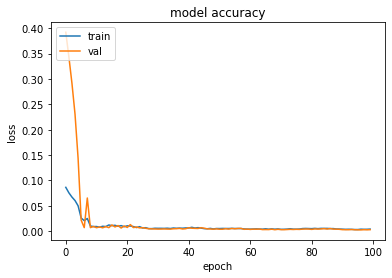

In [19]:
target = 'EMA_200'

columns = columns_5
num_features = len(columns)
crypto = cryptos[0]
execute_test()

SMA 200

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,SMA 200_19,ADX_19,SMA 200_18,ADX_18,SMA 200_17,ADX_17,SMA 200_16,ADX_16,SMA 200_15,ADX_15,...,ADX_4,SMA 200_3,ADX_3,SMA 200_2,ADX_2,SMA 200_1,ADX_1,SMA 200_0,ADX_0,SMA 200
342,710.05045,35.636123,708.48280,34.690646,706.92065,33.990806,705.40345,32.739224,703.84995,31.248367,...,26.199775,688.11095,24.683538,685.72815,23.265035,683.27840,21.832497,680.87830,20.764010,608.53340
343,708.48280,34.690646,706.92065,33.990806,705.40345,32.739224,703.84995,31.248367,702.83250,30.423749,...,24.683538,685.72815,23.265035,683.27840,21.832497,680.87830,20.764010,678.21825,19.452398,604.67030
344,706.92065,33.990806,705.40345,32.739224,703.84995,31.248367,702.83250,30.423749,701.85575,30.761095,...,23.265035,683.27840,21.832497,680.87830,20.764010,678.21825,19.452398,674.91600,18.283855,600.48095
345,705.40345,32.739224,703.84995,31.248367,702.83250,30.423749,701.85575,30.761095,700.72145,31.166891,...,21.832497,680.87830,20.764010,678.21825,19.452398,674.91600,18.283855,671.60055,17.020782,595.65700
346,703.84995,31.248367,702.83250,30.423749,701.85575,30.761095,700.72145,31.166891,699.30900,31.711802,...,20.764010,678.21825,19.452398,674.91600,18.283855,671.60055,17.020782,667.49200,15.987591,591.35950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,3111.99135,19.071649,3117.22805,19.441324,3121.54665,19.895549,3127.41245,20.260773,3131.08270,19.858133,...,17.630929,3166.00945,16.807307,3169.72035,16.765313,3178.50795,17.981035,3186.40280,19.049911,3331.78195
1574,3117.22805,19.441324,3121.54665,19.895549,3127.41245,20.260773,3131.08270,19.858133,3134.06390,19.464946,...,16.807307,3169.72035,16.765313,3178.50795,17.981035,3186.40280,19.049911,3195.77990,19.747824,3339.61265
1575,3121.54665,19.895549,3127.41245,20.260773,3131.08270,19.858133,3134.06390,19.464946,3138.36345,19.925177,...,16.765313,3178.50795,17.981035,3186.40280,19.049911,3195.77990,19.747824,3206.49010,20.202159,3346.80635
1576,3127.41245,20.260773,3131.08270,19.858133,3134.06390,19.464946,3138.36345,19.925177,3140.15895,19.969782,...,17.981035,3186.40280,19.049911,3195.77990,19.747824,3206.49010,20.202159,3216.53635,20.614088,3353.10360


,SMA 200_19,ADX_19,SMA 200_18,ADX_18,SMA 200_17,ADX_17,SMA 200_16,ADX_16,SMA 200_15,ADX_15,...,ADX_4,SMA 200_3,ADX_3,SMA 200_2,ADX_2,SMA 200_1,ADX_1,SMA 200_0,ADX_0,SMA 200
1578,3134.0639,19.464946,3138.36345,19.925177,3140.15895,19.969782,3143.16345,19.934622,3143.64005,19.004087,...,19.747824,3206.4901,20.202159,3216.53635,20.614088,3222.7839,21.222026,3229.7052,22.210426,3364.82675


Input shape: (1236, 1, 40) (1236, 1)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_61 (LSTM)               (None, 1, 25)             6600      
_________________________________________________________________
lstm_62 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_49 (Dropout)         (None, 1, 25)             0         
_________________________________________________________________
lstm_63 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_50 (Dropout)         (None, 1, 25)             0         
_________________________________________________________________
lstm_64 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_51 (Drop

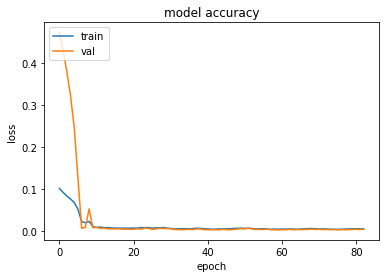

In [20]:
target = 'SMA 200'

columns = columns_6
num_features = len(columns)
crypto = crypto
execute_test()

Tras analizar los resultados obtenidos observamos ligeras mejores cuando el valor del precio esta suavizado (menos outliers). Entre SMA y EMA parece que EMA se comporta ligeramente mejor. No es algo determinante pero seguiremos usando EMA porque cambia de forma mas rapida y de acuerda al valor real de las tendencias porque tiene mas en cuenta los ultimos precios a la hora de calcularse

Además hemos visto dificultades en la red para predecir el valor de la métrica ADX. De ahora en adelante analizaremos RSI en vez de ADX pero es posible que si no conseguimos buenas predicciones usemos solo el valor del precio, sus diferencias o la operación mas adecuada (se comenta más adelante estos dos nuevos métodos)

Antes de seguir probaremos dos metodos mas:
- Uso de la diferencia de precio
- Uso de la operación mas conveniente

In [8]:
columns_7 = ['RSI', 'close_diff_5']
columns_8 = ['RSI', 'close_diff_10']
columns_9 = ['RSI', 'close_diff_20']
columns_11 = ['op_buy', 'op_sell', 'op_hold'] # Usar softmax

Dado que actualmente tenemos puesto el parametro de dias de prediccion a 20, usaremos la columna con un calculo de diferencia de precio de 20 dias -> columns_9

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,RSI_19,close_diff_20_19,RSI_18,close_diff_20_18,RSI_17,close_diff_20_17,RSI_16,close_diff_20_16,RSI_15,close_diff_20_15,...,close_diff_20_4,RSI_3,close_diff_20_3,RSI_2,close_diff_20_2,RSI_1,close_diff_20_1,RSI_0,close_diff_20_0,close_diff_20
163,80.914056,339.09,81.309636,335.18,86.146268,500.79,79.935566,464.59,67.133485,502.96,...,137.72,47.319361,45.97,51.974254,121.00,51.702144,97.22,51.347368,46.92,-126.48
164,81.309636,335.18,86.146268,500.79,79.935566,464.59,67.133485,502.96,72.227956,613.53,...,45.97,51.974254,121.00,51.702144,97.22,51.347368,46.92,55.424951,-4.10,-180.32
165,86.146268,500.79,79.935566,464.59,67.133485,502.96,72.227956,613.53,76.756435,730.02,...,121.00,51.702144,97.22,51.347368,46.92,55.424951,-4.10,62.115254,118.78,-281.97
166,79.935566,464.59,67.133485,502.96,72.227956,613.53,76.756435,730.02,72.845019,632.05,...,97.22,51.347368,46.92,55.424951,-4.10,62.115254,118.78,56.928602,-113.99,-266.01
167,67.133485,502.96,72.227956,613.53,76.756435,730.02,72.845019,632.05,66.121951,521.00,...,46.92,55.424951,-4.10,62.115254,118.78,56.928602,-113.99,51.296643,-161.50,-147.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,47.095555,1.78,39.023233,-421.99,48.716109,-27.92,51.957920,124.96,47.702403,-61.12,...,-154.25,46.826530,-428.55,44.735958,-509.25,46.793026,-367.34,50.574650,137.83,-284.03
1574,39.023233,-421.99,48.716109,-27.92,51.957920,124.96,47.702403,-61.12,43.413283,-503.92,...,-428.55,44.735958,-509.25,46.793026,-367.34,50.574650,137.83,49.541304,18.60,-269.17
1575,48.716109,-27.92,51.957920,124.96,47.702403,-61.12,43.413283,-503.92,50.467423,-263.91,...,-509.25,46.793026,-367.34,50.574650,137.83,49.541304,18.60,52.829940,440.01,-644.16
1576,51.957920,124.96,47.702403,-61.12,43.413283,-503.92,50.467423,-263.91,48.661227,-262.96,...,-367.34,50.574650,137.83,49.541304,18.60,52.829940,440.01,44.841174,-189.12,-475.45


,RSI_19,close_diff_20_19,RSI_18,close_diff_20_18,RSI_17,close_diff_20_17,RSI_16,close_diff_20_16,RSI_15,close_diff_20_15,...,close_diff_20_4,RSI_3,close_diff_20_3,RSI_2,close_diff_20_2,RSI_1,close_diff_20_1,RSI_0,close_diff_20_0,close_diff_20
1578,43.413283,-503.92,50.467423,-263.91,48.661227,-262.96,54.986266,50.61,43.948042,-476.8,...,18.6,52.82994,440.01,44.841174,-189.12,40.686916,-514.23,45.681743,-168.94,-363.91


Input shape: (1415, 1, 40) (1415, 1)
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_66 (LSTM)               (None, 1, 25)             6600      
_________________________________________________________________
lstm_67 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_53 (Dropout)         (None, 1, 25)             0         
_________________________________________________________________
lstm_68 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_54 (Dropout)         (None, 1, 25)             0         
_________________________________________________________________
lstm_69 (LSTM)               (None, 1, 25)             5100      
_________________________________________________________________
dropout_55 (Drop

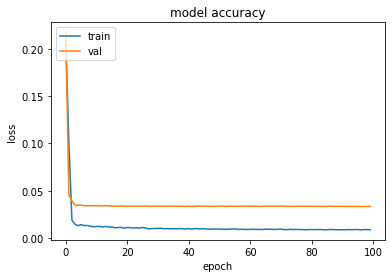

In [22]:
target = 'close_diff_20'

columns = columns_9
num_features = len(columns)

crypto = crypto
execute_test()

Este metodo ofrece resultados aceptables en comparación con el calculo del precio como valor y por tanto usaremos este en vez del precio final como prediccion dado que si calculamos el precio final luego debemos calcular cuanto mas sube o baja con respecto al dia actual. Este método ya nos da directamente ese valor

Como podemos ver la precision de prediccion no es demasiado acertada para las metricas y por tanto evitaremos su uso en nuestro modelo final

La precision de este metodo mejorará al usar menos dias de predicción. De todas formas trataremos de mejorar la red con 20 dias en adelante antes de bajar a 10 o 5 dias. Además es posible que no exista una relación temparal tal como para el precio. Por eso podemos encontrar dificultades en el modelo para generar buenos resultados.

En adelante usaremos la combinacion de precio con diferencia de precio. Si al modelo le costara mucho predecir la diferencia de precio usaremos solo el precio.

----------------------

Para calcular la operacion mas adecuada debemos cambiar la red para aceptar una activación softmax

Vamos a buscar ejemplos donde se realiza una venta o compra en la fila de test para poner mas aprueba al modelo (debido a que la mayoria son hold).

Debemos añadir un class weight en el modelo. Por eso analizamos el peso de cada clase

In [23]:
columns = columns_11

target = None

activation = 'softmax'
loss = 'categorical_crossentropy'
metrics = ['categorical_crossentropy', 'accuracy']

crypto = 'ETH'

sim = DLSimulator(crypto, prev_periods, pred_periods, columns, target,
    norm_strat, model_sel, layers, neurons, batch_size, epochs, 
    activation, loss, metrics, optimizer, initial_learning_rate, callbacks)

df = sim.get_df()

print(len(df[(df['op_buy_0']==1)]))
print(len(df[(df['op_sell_0']==1)]))
print(len(df[(df['op_hold_0']==1)]))

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model
224
221
991


Añadiremos al modelo un x4 para las clases sell y buy

The index [-7, -9, -15, -19] provide examples with buy and sell

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,op_buy_19,op_sell_19,op_hold_19,op_buy_18,op_sell_18,op_hold_18,op_buy_17,op_sell_17,op_hold_17,op_buy_16,...,op_hold_2,op_buy_1,op_sell_1,op_hold_1,op_buy_0,op_sell_0,op_hold_0,op_buy,op_sell,op_hold
143,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0,0,1,1.0,0.0,0.0
144,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0,0,1,0.0,0.0,1.0
145,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0,0,1,0.0,1.0,0.0
146,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0,1,0,0.0,0.0,1.0
147,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0,0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0,1,0,0.0,0.0,1.0
1568,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0,0,1,0.0,0.0,1.0
1569,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0,0,1,0.0,0.0,1.0
1570,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0,0,1,0.0,1.0,0.0


,op_buy_19,op_sell_19,op_hold_19,op_buy_18,op_sell_18,op_hold_18,op_buy_17,op_sell_17,op_hold_17,op_buy_16,...,op_hold_2,op_buy_1,op_sell_1,op_hold_1,op_buy_0,op_sell_0,op_hold_0,op_buy,op_sell,op_hold
1572,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0,0,1,0.0,1.0,0.0


Input shape: (1429, 20, 3) (1429, 3)
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_71 (LSTM)               (None, 20, 25)            2900      
_________________________________________________________________
lstm_72 (LSTM)               (None, 20, 25)            5100      
_________________________________________________________________
dropout_57 (Dropout)         (None, 20, 25)            0         
_________________________________________________________________
lstm_73 (LSTM)               (None, 20, 25)            5100      
_________________________________________________________________
dropout_58 (Dropout)         (None, 20, 25)            0         
_________________________________________________________________
lstm_74 (LSTM)               (None, 20, 25)            5100      
_________________________________________________________________
dropout_59 (Drop

../dl_solutions/dlsolutions.py:311: RuntimeWarning: divide by zero encountered in true_divide
  print('% Diff', 100*((inv_y - inv_preds)/inv_y), '%')


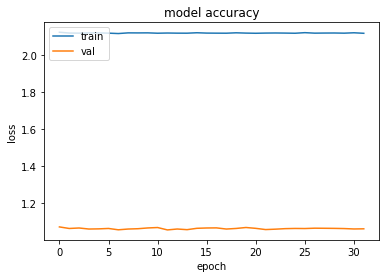

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,op_buy_19,op_sell_19,op_hold_19,op_buy_18,op_sell_18,op_hold_18,op_buy_17,op_sell_17,op_hold_17,op_buy_16,...,op_hold_2,op_buy_1,op_sell_1,op_hold_1,op_buy_0,op_sell_0,op_hold_0,op_buy,op_sell,op_hold
143,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0,0,1,1.0,0.0,0.0
144,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0,0,1,0.0,0.0,1.0
145,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0,0,1,0.0,1.0,0.0
146,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0,1,0,0.0,0.0,1.0
147,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0,0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0,0,1,0.0,0.0,1.0
1566,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0,0,1,0.0,0.0,1.0
1567,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0,1,0,0.0,0.0,1.0
1568,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0,0,1,0.0,0.0,1.0


,op_buy_19,op_sell_19,op_hold_19,op_buy_18,op_sell_18,op_hold_18,op_buy_17,op_sell_17,op_hold_17,op_buy_16,...,op_hold_2,op_buy_1,op_sell_1,op_hold_1,op_buy_0,op_sell_0,op_hold_0,op_buy,op_sell,op_hold
1570,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0,0,1,0.0,1.0,0.0


Input shape: (1427, 20, 3) (1427, 3)
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_76 (LSTM)               (None, 20, 25)            2900      
_________________________________________________________________
lstm_77 (LSTM)               (None, 20, 25)            5100      
_________________________________________________________________
dropout_61 (Dropout)         (None, 20, 25)            0         
_________________________________________________________________
lstm_78 (LSTM)               (None, 20, 25)            5100      
_________________________________________________________________
dropout_62 (Dropout)         (None, 20, 25)            0         
_________________________________________________________________
lstm_79 (LSTM)               (None, 20, 25)            5100      
_________________________________________________________________
dropout_63 (Drop

../dl_solutions/dlsolutions.py:311: RuntimeWarning: divide by zero encountered in true_divide
  print('% Diff', 100*((inv_y - inv_preds)/inv_y), '%')


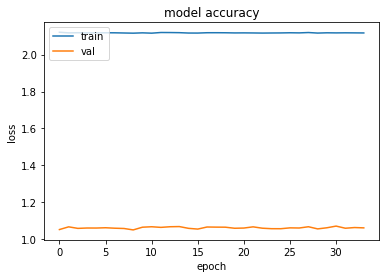

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,op_buy_19,op_sell_19,op_hold_19,op_buy_18,op_sell_18,op_hold_18,op_buy_17,op_sell_17,op_hold_17,op_buy_16,...,op_hold_2,op_buy_1,op_sell_1,op_hold_1,op_buy_0,op_sell_0,op_hold_0,op_buy,op_sell,op_hold
143,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0,0,1,1.0,0.0,0.0
144,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0,0,1,0.0,0.0,1.0
145,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0,0,1,0.0,1.0,0.0
146,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0,1,0,0.0,0.0,1.0
147,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0,0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1,0,0,0.0,1.0,0.0
1560,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0,0,1,1.0,0.0,0.0
1561,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1,0,0,0.0,0.0,1.0
1562,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0,1,0,0.0,0.0,1.0


,op_buy_19,op_sell_19,op_hold_19,op_buy_18,op_sell_18,op_hold_18,op_buy_17,op_sell_17,op_hold_17,op_buy_16,...,op_hold_2,op_buy_1,op_sell_1,op_hold_1,op_buy_0,op_sell_0,op_hold_0,op_buy,op_sell,op_hold
1564,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0,0,1,1.0,0.0,0.0


Input shape: (1421, 20, 3) (1421, 3)
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_81 (LSTM)               (None, 20, 25)            2900      
_________________________________________________________________
lstm_82 (LSTM)               (None, 20, 25)            5100      
_________________________________________________________________
dropout_65 (Dropout)         (None, 20, 25)            0         
_________________________________________________________________
lstm_83 (LSTM)               (None, 20, 25)            5100      
_________________________________________________________________
dropout_66 (Dropout)         (None, 20, 25)            0         
_________________________________________________________________
lstm_84 (LSTM)               (None, 20, 25)            5100      
_________________________________________________________________
dropout_67 (Drop

../dl_solutions/dlsolutions.py:311: RuntimeWarning: divide by zero encountered in true_divide
  print('% Diff', 100*((inv_y - inv_preds)/inv_y), '%')


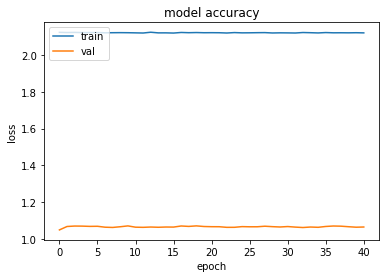

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,op_buy_19,op_sell_19,op_hold_19,op_buy_18,op_sell_18,op_hold_18,op_buy_17,op_sell_17,op_hold_17,op_buy_16,...,op_hold_2,op_buy_1,op_sell_1,op_hold_1,op_buy_0,op_sell_0,op_hold_0,op_buy,op_sell,op_hold
143,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0,0,1,1.0,0.0,0.0
144,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0,0,1,0.0,0.0,1.0
145,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0,0,1,0.0,1.0,0.0
146,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0,1,0,0.0,0.0,1.0
147,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0,0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1,0,0,0.0,1.0,0.0
1556,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0,0,1,0.0,0.0,1.0
1557,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0,1,0,1.0,0.0,0.0
1558,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0,0,1,0.0,0.0,1.0


,op_buy_19,op_sell_19,op_hold_19,op_buy_18,op_sell_18,op_hold_18,op_buy_17,op_sell_17,op_hold_17,op_buy_16,...,op_hold_2,op_buy_1,op_sell_1,op_hold_1,op_buy_0,op_sell_0,op_hold_0,op_buy,op_sell,op_hold
1560,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0,0,1,1.0,0.0,0.0


Input shape: (1417, 20, 3) (1417, 3)
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_86 (LSTM)               (None, 20, 25)            2900      
_________________________________________________________________
lstm_87 (LSTM)               (None, 20, 25)            5100      
_________________________________________________________________
dropout_69 (Dropout)         (None, 20, 25)            0         
_________________________________________________________________
lstm_88 (LSTM)               (None, 20, 25)            5100      
_________________________________________________________________
dropout_70 (Dropout)         (None, 20, 25)            0         
_________________________________________________________________
lstm_89 (LSTM)               (None, 20, 25)            5100      
_________________________________________________________________
dropout_71 (Drop

../dl_solutions/dlsolutions.py:311: RuntimeWarning: divide by zero encountered in true_divide
  print('% Diff', 100*((inv_y - inv_preds)/inv_y), '%')


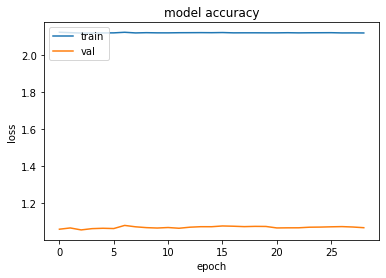

In [24]:
split_indexes = [-7, -9, -15, -19]

for split_index in split_indexes:
    execute_test(split_index)

En los cuatro casos el modelo no ha acertado. Consideraremos esta opción para nuestro modelo final una vez optimizado sobre el precio

----------

Ejemplo con target none

El siguiente análisis se centrará en los hiperparametros y modelado de la red (layers, epochs, batch size, dropout). Antes de comenzar inicializaremos los parametros que dejaremos fijos durante esta etapa de analisis 

In [9]:
#### PERIODS ####
prev_periods = 20
pred_periods = 20

#LSTM
model_sel = 0 

# Cryptos
cryptos = ['ETH', 'ADA', 'BTC', 'LNK', 'LTC']

#### NORM AND FEATURES CONFIGURATION ####
target = None
norm_strat = 2

#### COLUMNS ####
columns_11 = ['op_buy', 'op_sell', 'op_hold'] # Usar softmax
columns_12 = ['close', 'close_diff_20']


#### Hyper params ####

#activations = ['relu', 'sigmoid', 'softmax']
#losses = ['mse', 'binary_crossentropy', 'categorical_crossentropy']
#metrics_opt = ['mse', 'accuracy']
activation = 'relu'
loss = 'mse'
metrics = ['mse']
optimizer = 'adam'
initial_learning_rate = 0.01
callbacks = ['mc', 'es']
batch_size = 64
epochs = 100

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,close_19,ADX_19,close_18,ADX_18,close_17,ADX_17,close_16,ADX_16,close_15,ADX_15,...,close_3,ADX_3,close_2,ADX_2,close_1,ADX_1,close_0,ADX_0,close,ADX
157,754.99,41.418230,855.28,36.212628,934.03,24.312204,940.00,21.025032,959.30,21.223914,...,1000.00,27.861915,994.00,27.314258,1032.50,26.829022,1152.75,26.295579,877.00,24.441875
158,855.28,36.212628,934.03,24.312204,940.00,21.025032,959.30,21.223914,1004.11,22.305116,...,994.00,27.314258,1032.50,26.829022,1152.75,26.295579,1049.00,25.001883,851.15,24.385214
159,934.03,24.312204,940.00,21.025032,959.30,21.223914,1004.11,22.305116,1123.09,23.246794,...,1032.50,26.829022,1152.75,26.295579,1049.00,25.001883,993.00,24.131656,808.99,24.078679
160,940.00,21.025032,959.30,21.223914,1004.11,22.305116,1123.09,23.246794,1133.18,25.900560,...,1152.75,26.295579,1049.00,25.001883,993.00,24.131656,980.00,23.956457,866.66,23.976865
161,959.30,21.223914,1004.11,22.305116,1123.09,23.246794,1133.18,25.900560,1291.00,26.950869,...,1049.00,25.001883,993.00,24.131656,980.00,23.956457,1061.00,23.763680,841.57,23.677467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4287.80,19.071649,3996.90,19.441324,4294.76,19.895549,4412.17,20.260773,4258.31,19.858133,...,4215.73,16.807307,4117.25,16.765313,4196.44,17.981035,4347.59,19.049911,4063.56,28.514337
1574,3996.90,19.441324,4294.76,19.895549,4412.17,20.260773,4258.31,19.858133,4085.97,19.464946,...,4117.25,16.765313,4196.44,17.981035,4347.59,19.049911,4306.40,19.747824,4037.23,28.403375
1575,4294.76,19.895549,4412.17,20.260773,4258.31,19.858133,4085.97,19.464946,4339.44,19.925177,...,4196.44,17.981035,4347.59,19.049911,4306.40,19.747824,4436.91,20.202159,3792.75,28.223716
1576,4412.17,20.260773,4258.31,19.858133,4085.97,19.464946,4339.44,19.925177,4269.36,19.969782,...,4347.59,19.049911,4306.40,19.747824,4436.91,20.202159,4105.64,20.614088,3630.19,29.015362


,close_19,ADX_19,close_18,ADX_18,close_17,ADX_17,close_16,ADX_16,close_15,ADX_15,...,close_3,ADX_3,close_2,ADX_2,close_1,ADX_1,close_0,ADX_0,close,ADX
1578,4085.97,19.464946,4339.44,19.925177,4269.36,19.969782,4524.85,19.934622,4041.2,19.004087,...,4436.91,20.202159,4105.64,20.614088,3897.94,21.222026,4089.37,22.210426,3725.46,31.29229


Input shape: (1421, 20, 2) (1421, 2)
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_96 (LSTM)               (None, 20, 25)            2800      
_________________________________________________________________
lstm_97 (LSTM)               (None, 20, 25)            5100      
_________________________________________________________________
dropout_77 (Dropout)         (None, 20, 25)            0         
_________________________________________________________________
lstm_98 (LSTM)               (None, 20, 25)            5100      
_________________________________________________________________
dropout_78 (Dropout)         (None, 20, 25)            0         
_________________________________________________________________
lstm_99 (LSTM)               (None, 20, 25)            5100      
_________________________________________________________________
dropout_79 (Drop

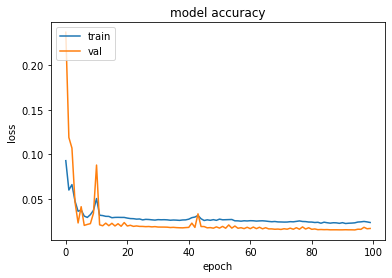

In [27]:
columns = columns_2
num_features = len(columns)


crypto = crypto
execute_test()

Modelado:

Modelaremos la red en las capas LSTM

Modifcamos el numero de capas:

- 1 Capas
- 4 Capas
- 10 Capas

Y neuronas

- 10 Nueronas
- 50 Neuronas
- 100 Neuronas
- Gradual invertido

Trabajaremos sobre diferencia de precio de 20 dias

In [10]:
target = 'close'

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
163,1123.09,339.09,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,...,137.72,980.00,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,924.55
164,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,...,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,938.67
165,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,...,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,969.99
166,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,...,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,911.00
167,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,1271.00,521.00,...,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,1085.50,-161.50,938.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4287.80,1.78,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,...,-154.25,4215.73,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4063.56
1574,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,...,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4037.23
1575,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,...,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,3792.75
1576,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,...,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,4105.64,-189.12,3630.19


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
1578,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,4524.85,50.61,4041.2,-476.8,...,18.6,4436.91,440.01,4105.64,-189.12,3897.94,-514.23,4089.37,-168.94,3725.46


Input shape: (1415, 1, 40) (1415, 1)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 1, 25)             6600      
_________________________________________________________________
lstm_17 (LSTM)               (None, 25)                5100      
_________________________________________________________________
dropout_10 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 26        
Total params: 11,726
Trainable params: 11,726
Non-trainable params: 0
_________________________________________________________________
None
Y shape (1415, 1)
Train on 1415 samples, validate on 283 samples
Epoch 1/100
 - 4s - loss: 0.0769 - mse: 0.0769 - val_loss: 0.3161 - val_mse: 0.3161
Epoch 2/100
 - 0s - loss: 0.0481 - mse: 0.0481 - val_loss

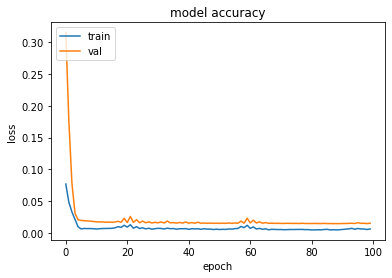

In [17]:
layers = 1
neurons = [25, 25]

columns = columns_12
num_features = len(columns)

crypto = crypto
execute_test()

Los resultados son incluso mejores para algunos sets que con la configuración inicial.

Iremos subiendo capas y neuronas hasta que perdamos eficiencia en nuestros resultados

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
163,1123.09,339.09,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,...,137.72,980.00,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,924.55
164,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,...,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,938.67
165,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,...,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,969.99
166,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,...,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,911.00
167,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,1271.00,521.00,...,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,1085.50,-161.50,938.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4287.80,1.78,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,...,-154.25,4215.73,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4063.56
1574,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,...,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4037.23
1575,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,...,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,3792.75
1576,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,...,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,4105.64,-189.12,3630.19


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
1578,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,4524.85,50.61,4041.2,-476.8,...,18.6,4436.91,440.01,4105.64,-189.12,3897.94,-514.23,4089.37,-168.94,3725.46


Input shape: (1415, 1, 40) (1415, 1)
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_109 (LSTM)              (None, 1, 100)            56400     
_________________________________________________________________
lstm_110 (LSTM)              (None, 100)               80400     
_________________________________________________________________
dropout_85 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 101       
Total params: 136,901
Trainable params: 136,901
Non-trainable params: 0
_________________________________________________________________
None
Y shape (1415, 1)
Train on 1415 samples, validate on 283 samples
Epoch 1/100
 - 5s - loss: 0.0574 - mse: 0.0574 - val_loss: 0.1564 - val_mse: 0.1564
Epoch 2/100
 - 0s - loss: 0.0204 - mse: 0.0204 - val_l

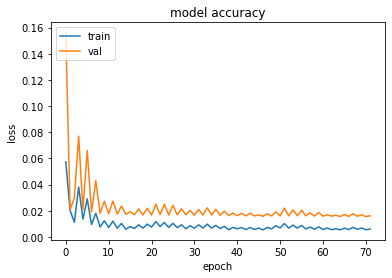

In [34]:
layers = 1
neurons = [100, 100]

columns = columns_12
num_features = len(columns)

crypto = crypto
execute_test()

Añadir neuronas no ha mejorado resultados en todos los casos pero si en unos pocos en el test, consiguiendo buenos datos en el set de validación pero no mejores que antes. Probaremos añadiendo capas y dejando las neuronas mas bajas. Dejaremos la capa base con mas neuronas.

El error en BTC puede deberse a un estancamiento por un lr muy alto. Quizás sin callbacks o con lr mas bajo hubieramos alcanzado un minimo.

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
163,1123.09,339.09,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,...,137.72,980.00,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,924.55
164,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,...,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,938.67
165,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,...,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,969.99
166,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,...,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,911.00
167,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,1271.00,521.00,...,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,1085.50,-161.50,938.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4287.80,1.78,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,...,-154.25,4215.73,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4063.56
1574,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,...,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4037.23
1575,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,...,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,3792.75
1576,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,...,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,4105.64,-189.12,3630.19


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
1578,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,4524.85,50.61,4041.2,-476.8,...,18.6,4436.91,440.01,4105.64,-189.12,3897.94,-514.23,4089.37,-168.94,3725.46


Input shape: (1415, 1, 40) (1415, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 100)            56400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 20)             9680      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 20)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 20)                3280      
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 69,381
Trainable params: 69,381
Non-trainable params: 0
_____________

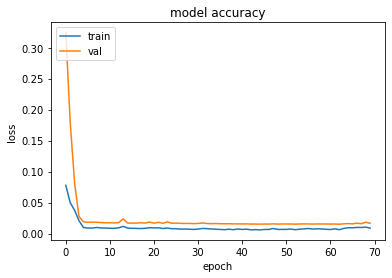

In [11]:
layers = 2
neurons = [100, 20, 20]

columns = columns_12
num_features = len(columns)

crypto = crypto
execute_test()

Vemos mejoras, aunque la diferencia de precio no esta obteniendo buenas predicciones en la fila de test. Como hemos comentado es posible que no tenga una relacion secuencial tan alta como el precio.

Sin embargo seguimos viendo como las funciones de perdida son más bajas que con el modelo usado como base. Esto es algo positivo.

Probaremos ahora a bajar capas de nuevo y subir neuronas

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
163,1123.09,339.09,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,...,137.72,980.00,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,924.55
164,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,...,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,938.67
165,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,...,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,969.99
166,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,...,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,911.00
167,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,1271.00,521.00,...,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,1085.50,-161.50,938.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4287.80,1.78,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,...,-154.25,4215.73,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4063.56
1574,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,...,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4037.23
1575,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,...,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,3792.75
1576,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,...,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,4105.64,-189.12,3630.19


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
1578,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,4524.85,50.61,4041.2,-476.8,...,18.6,4436.91,440.01,4105.64,-189.12,3897.94,-514.23,4089.37,-168.94,3725.46


Input shape: (1415, 1, 40) (1415, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 200)            192800    
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 313,301
Trainable params: 313,301
Non-trainable params: 0
_________________________________________________________________
None
Y shape (1415, 1)
Train on 1415 samples, validate on 283 samples
Epoch 1/100
 - 5s - loss: 0.0649 - mse: 0.0649 - val_loss: 0.1463 - val_mse: 0.1463
Epoch 2/100
 - 0s - loss: 0.0185 - mse: 0.0185 - val_lo

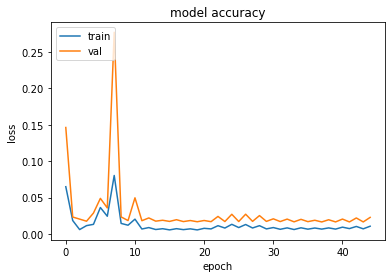

In [12]:
layers = 1
neurons = [200, 100]

columns = columns_12
num_features = len(columns)

crypto = crypto
execute_test()

Vemos que tenemos algo de overfitting en esta prueba. Sin embargo los datos de perdidas son bastante buenos. Seguiremos con esta idea e intentaremos paliar el overfitting más adelante.

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
163,1123.09,339.09,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,...,137.72,980.00,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,924.55
164,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,...,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,938.67
165,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,...,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,969.99
166,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,...,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,911.00
167,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,1271.00,521.00,...,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,1085.50,-161.50,938.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4287.80,1.78,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,...,-154.25,4215.73,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4063.56
1574,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,...,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4037.23
1575,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,...,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,3792.75
1576,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,...,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,4105.64,-189.12,3630.19


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
1578,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,4524.85,50.61,4041.2,-476.8,...,18.6,4436.91,440.01,4105.64,-189.12,3897.94,-514.23,4089.37,-168.94,3725.46


Input shape: (1415, 1, 40) (1415, 1)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1, 200)            192800    
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 100)            120400    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 100)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 343,451
Trainable params: 343,451
Non-trainable params: 0
___________

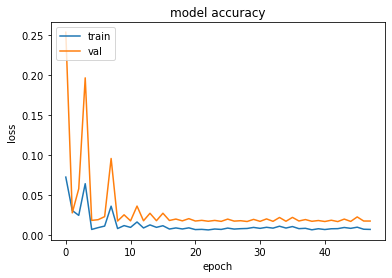

In [13]:
layers = 2
neurons = [200, 100, 50]

columns = columns_12
num_features = len(columns)

crypto = crypto
execute_test()

Definitivamente añadiendo capas nuestro modelo se hace mucho más complejo de manejar y obtiene valores de perdidas peores. Sin embargo los test realzados son mejores. Probaremos una vez más a subir el numero de nueronas con solo una capa oculta. Posiblemente esto genere más overfitting que seremos capaces de resolver más adelante.

Tengamos en cuenta que si a este modelo le quitamos o añadimos paciencia al early stopping junto con un lr mas bajo y epocas mas altas, posiblemente obtengamos buenos resultados.

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
163,1123.09,339.09,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,...,137.72,980.00,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,924.55
164,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,...,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,938.67
165,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,...,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,969.99
166,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,...,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,911.00
167,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,1271.00,521.00,...,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,1085.50,-161.50,938.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4287.80,1.78,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,...,-154.25,4215.73,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4063.56
1574,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,...,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4037.23
1575,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,...,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,3792.75
1576,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,...,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,4105.64,-189.12,3630.19


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
1578,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,4524.85,50.61,4041.2,-476.8,...,18.6,4436.91,440.01,4105.64,-189.12,3897.94,-514.23,4089.37,-168.94,3725.46


Input shape: (1415, 1, 40) (1415, 1)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 1, 400)            705600    
_________________________________________________________________
lstm_10 (LSTM)               (None, 200)               480800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 1,186,601
Trainable params: 1,186,601
Non-trainable params: 0
_________________________________________________________________
None
Y shape (1415, 1)
Train on 1415 samples, validate on 283 samples
Epoch 1/100
 - 5s - loss: 0.0696 - mse: 0.0696 - val_loss: 0.1018 - val_mse: 0.1018
Epoch 2/100
 - 1s - loss: 0.0214 - mse: 0.0214 - va

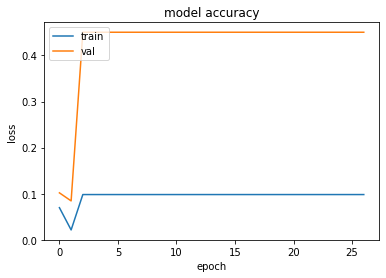

In [14]:
layers = 1
neurons = [400, 200]

columns = columns_12
num_features = len(columns)

crypto = crypto
execute_test()

Bajaremos el numero de nueronas y lo igualamos a la capa oculta. El earlystopping esta impidiendo que el modelo encuentre minimos a tiempo

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
163,1123.09,339.09,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,...,137.72,980.00,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,924.55
164,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,...,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,938.67
165,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,...,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,969.99
166,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,...,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,911.00
167,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,1271.00,521.00,...,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,1085.50,-161.50,938.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4287.80,1.78,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,...,-154.25,4215.73,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4063.56
1574,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,...,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4037.23
1575,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,...,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,3792.75
1576,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,...,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,4105.64,-189.12,3630.19


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
1578,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,4524.85,50.61,4041.2,-476.8,...,18.6,4436.91,440.01,4105.64,-189.12,3897.94,-514.23,4089.37,-168.94,3725.46


Input shape: (1415, 1, 40) (1415, 1)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_11 (LSTM)               (None, 1, 300)            409200    
_________________________________________________________________
lstm_12 (LSTM)               (None, 300)               721200    
_________________________________________________________________
dropout_7 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 301       
Total params: 1,130,701
Trainable params: 1,130,701
Non-trainable params: 0
_________________________________________________________________
None
Y shape (1415, 1)
Train on 1415 samples, validate on 283 samples
Epoch 1/100
 - 5s - loss: 0.0397 - mse: 0.0397 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 2/100
 - 1s - loss: 0.0681 - mse: 0.0681 - va

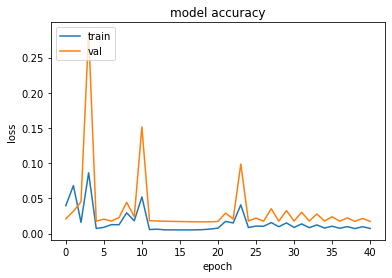

In [15]:
layers = 1
neurons = [300, 300]

columns = columns_12
num_features = len(columns)

crypto = crypto
execute_test()

Nos quedaremos con dos capas ocultas y 300 + 150 neuronas. Probemos sin early stop porque nos esta impidiendo llegar a minimos.

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
163,1123.09,339.09,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,...,137.72,980.00,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,924.55
164,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,...,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,938.67
165,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,...,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,969.99
166,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,...,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,911.00
167,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,1271.00,521.00,...,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,1085.50,-161.50,938.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4287.80,1.78,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,...,-154.25,4215.73,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4063.56
1574,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,...,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4037.23
1575,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,...,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,3792.75
1576,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,...,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,4105.64,-189.12,3630.19


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
1578,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,4524.85,50.61,4041.2,-476.8,...,18.6,4436.91,440.01,4105.64,-189.12,3897.94,-514.23,4089.37,-168.94,3725.46


Input shape: (1415, 1, 40) (1415, 1)
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 1, 300)            409200    
_________________________________________________________________
lstm_21 (LSTM)               (None, 150)               270600    
_________________________________________________________________
dropout_12 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 151       
Total params: 679,951
Trainable params: 679,951
Non-trainable params: 0
_________________________________________________________________
None
Y shape (1415, 1)
Train on 1415 samples, validate on 283 samples
Epoch 1/100
 - 5s - loss: 0.0803 - mse: 0.0803 - val_loss: 0.1985 - val_mse: 0.1985
Epoch 2/100
 - 1s - loss: 0.0126 - mse: 0.0126 - val_lo

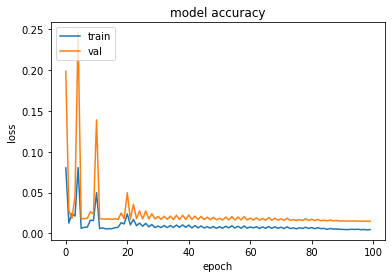

In [20]:
layers = 1
neurons = [300, 150]

callbacks = ['mc']

columns = columns_12
num_features = len(columns)

crypto = crypto
execute_test()

Hemos obtenido una buena configuración con:

2 capas ocultas

300 base

150 + 75 en capas ocultas

Como columnas seguiremos usando el precio como tal dado que los resultados han sido buenos. Si encontraramos dificultades podriamos volver a usar EMA.


Añadimos/quitamos ad hoc en el modelo capas de dropout y su activación

Tenemos algo de overfitting en nuestro modelo que ya contiene 0.2 de dropout. Se supone que deberíamos subirlo algo y ver si mejora. En caso de aumento de perdidas probaremos a reducirlo de nuevo

In [21]:
#### PERIODS ####
prev_periods = 20
pred_periods = 20

#LSTM
model_sel = 0 

# Cryptos
cryptos = ['ETH', 'ADA', 'BTC', 'LNK', 'LTC']

#### NORM AND FEATURES CONFIGURATION ####
target = 'close'
norm_strat = 2

#### COLUMNS ####
columns_11 = ['op_buy', 'op_sell', 'op_hold'] # Usar softmax
columns_12 = ['close', 'close_diff_20']


#### Hyper params ####

#activations = ['relu', 'sigmoid', 'softmax']
#losses = ['mse', 'binary_crossentropy', 'categorical_crossentropy']
#metrics_opt = ['mse', 'accuracy']
activation = 'relu'
loss = 'mse'
metrics = ['mse']
initial_learning_rate = 0.01

optimizer = 'adam'

callbacks = ['mc', 'es']
batch_size = 64
epochs = 100

layers = 2
neurons = [100, 50, 50]

columns = columns_12
num_features = len(columns)

Dropout 0.3

In [ ]:
for crypto in cryptos:
    crypto = crypto
    execute_test()

No observamos mejoras

Probamos con Dropout 0.1

Eliminaremos el overfitting con regularizers en el kernel l1_l2 si mejora con un dropout mas bajo

In [ ]:
for crypto in cryptos:
    crypto = crypto
    execute_test()

No vemos mejoras. Nos quedaremos con Dropout 0.2

Vemos que el learning rate puede estar algo alto pues alcanzamos minimos muy pronto y los set de validación no terminan de fijarse en un valor de perdidas (acaban dando pequeños saltos). Probaremos a bajarlo y a eliminar de nuevo el early stop

Se han hechos pruebas con el lr shceduler sin exito

In [22]:
callbacks = ['mc']

learning_rate=0.0005

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
163,1123.09,339.09,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,...,137.72,980.00,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,924.55
164,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,...,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,938.67
165,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,...,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,969.99
166,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,...,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,911.00
167,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,1271.00,521.00,...,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,1085.50,-161.50,938.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4287.80,1.78,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,...,-154.25,4215.73,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4063.56
1574,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,...,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4037.23
1575,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,...,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,3792.75
1576,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,...,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,4105.64,-189.12,3630.19


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
1578,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,4524.85,50.61,4041.2,-476.8,...,18.6,4436.91,440.01,4105.64,-189.12,3897.94,-514.23,4089.37,-168.94,3725.46


Input shape: (1415, 1, 40) (1415, 1)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 1, 100)            56400     
_________________________________________________________________
lstm_23 (LSTM)               (None, 1, 50)             30200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_14 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 106,851
Trainable params: 106,851
Non-trainable params: 0
__________

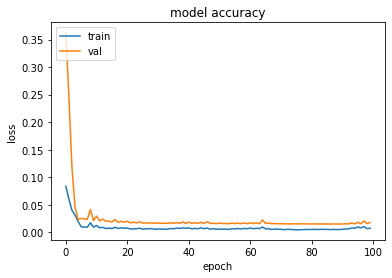

In [23]:
optimizer = optimizers.Adam(learning_rate=0.0005)

crypto = crypto
execute_test()

Eliminaremos el overfitting que podamos tener con el uso de regularizacion del kernel l1_l2

kernel_regularizer=tensorflow.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

Aprovechamos para volver a probar una sola capa

In [27]:
#### PERIODS ####
prev_periods = 20
pred_periods = 20

#LSTM
model_sel = 0 

# Cryptos
cryptos = ['ETH', 'ADA', 'BTC', 'LNK', 'LTC']

#### NORM AND FEATURES CONFIGURATION ####
target = 'close'
norm_strat = 2

#### COLUMNS ####
columns_11 = ['op_buy', 'op_sell', 'op_hold'] # Usar softmax
columns_12 = ['close', 'close_diff_20']


#### Hyper params ####

#activations = ['relu', 'sigmoid', 'softmax']
#losses = ['mse', 'binary_crossentropy', 'categorical_crossentropy']
#metrics_opt = ['mse', 'accuracy']
activation = 'relu'
loss = 'mse'
metrics = ['mse']
initial_learning_rate = 0.01

optimizer = optimizers.Adam(learning_rate=0.0005)

callbacks = ['mc', 'es']
batch_size = 64
epochs = 100

layers = 2
neurons = [100, 50, 50]

columns = columns_12
num_features = len(columns)

Se ha probado regularizar en recurrent layer y bias pero los resultados no son optimos

El siguiente resultado aplica solo a kernel

Para reducir el contenido no se muestran los resultados aplicados a recurrent y bias. Asi como varias pruebas con regularizers mas altos que tampoco han dado buenos resultados

In [ ]:
crypto = crypto
execute_test()

No hemos conseguido mejorar el modelo con regularización

Ahora modificaremos el batch size y epocas

Si bien, pareciera que 100 epocas han sido más que suficiente y no tocaremos este parametro a no ser que veamos falta de convergencia al modificar el batch

Hemos probado con batch size de 64. Probemos con un batch mas pequeño para actualizar de forma mas recurrente los pesos. Si mejora seguiremos reduciendo

Batch size 32

Loading... ETH
Extracting columns columns for ETH
Proccessing and arranging columns for LSTM model


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
163,1123.09,339.09,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,...,137.72,980.00,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,924.55
164,1133.18,335.18,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,...,45.97,1061.00,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,938.67
165,1291.00,500.79,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,...,121.00,1056.52,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,969.99
166,1247.00,464.59,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,...,97.22,1051.03,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,911.00
167,1138.93,502.96,1253.87,613.53,1388.02,730.02,1347.00,632.05,1271.00,521.00,...,46.92,1118.99,-4.10,1251.96,118.78,1177.01,-113.99,1085.50,-161.50,938.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573,4287.80,1.78,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,...,-154.25,4215.73,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4063.56
1574,3996.90,-421.99,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,...,-428.55,4117.25,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4037.23
1575,4294.76,-27.92,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,...,-509.25,4196.44,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,3792.75
1576,4412.17,124.96,4258.31,-61.12,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,...,-367.34,4347.59,137.83,4306.40,18.60,4436.91,440.01,4105.64,-189.12,3630.19


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
1578,4085.97,-503.92,4339.44,-263.91,4269.36,-262.96,4524.85,50.61,4041.2,-476.8,...,18.6,4436.91,440.01,4105.64,-189.12,3897.94,-514.23,4089.37,-168.94,3725.46


Input shape: (1415, 1, 40) (1415, 1)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 1, 100)            56400     
_________________________________________________________________
lstm_29 (LSTM)               (None, 1, 50)             30200     
_________________________________________________________________
dropout_17 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 106,851
Trainable params: 106,851
Non-trainable params: 0
__________

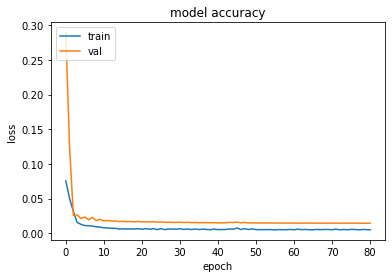

In [28]:
batch_size = 32

crypto = crypto
execute_test()

Batch size 16

El entrenamiento se hace muy lento y por ello bajaremos el numeor de epochs

Loading... BTC
Extracting columns columns for BTC
Proccessing and arranging columns for LSTM model


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
163,16150.03,-2706.22,14902.54,-2392.66,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,...,-3915.06,10799.18,-4120.33,11349.99,-3709.55,11175.27,-5785.12,11089.00,-5980.79,10000.09
164,14902.54,-2392.66,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,...,-4120.33,11349.99,-3709.55,11175.27,-5785.12,11089.00,-5980.79,11491.00,-4659.03,10159.98
165,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,14210.00,710.00,...,-3709.55,11175.27,-5785.12,11089.00,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11039.55
166,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,14210.00,710.00,13474.99,-224.35,...,-5785.12,11089.00,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11251.00,-3149.00,10383.43
167,13238.78,-87.83,13740.01,440.01,14210.00,710.00,13474.99,-224.35,13539.93,-2149.08,...,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11251.00,-3149.00,10237.51,-4669.58,11153.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,50588.95,-9755.92,50471.19,-6420.43,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,...,-7892.18,50838.81,-2762.24,50820.00,1667.53,50399.66,1003.33,50775.49,333.57,43084.29
1594,50471.19,-6420.43,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,...,-2762.24,50820.00,1667.53,50399.66,1003.33,50775.49,333.57,50701.44,112.49,43071.66
1595,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,46702.75,-10838.52,...,1667.53,50399.66,1003.33,50775.49,333.57,50701.44,112.49,47543.74,-2927.45,42201.62
1596,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,46702.75,-10838.52,48343.28,-8795.01,...,1003.33,50775.49,333.57,50701.44,112.49,47543.74,-2927.45,46464.66,-1080.93,42352.12


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
1598,50053.9,-6193.28,46702.75,-10838.52,48343.28,-8795.01,48864.98,-10095.38,47632.38,-6094.15,...,112.49,47543.74,-2927.45,46464.66,-1080.93,47120.87,-19.67,46216.93,-3173.06,41761.89


Input shape: (1435, 1, 40) (1435, 1)
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 1, 100)            56400     
_________________________________________________________________
lstm_41 (LSTM)               (None, 1, 50)             30200     
_________________________________________________________________
dropout_25 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_42 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_26 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 51        
Total params: 106,851
Trainable params: 106,851
Non-trainable params: 0
__________

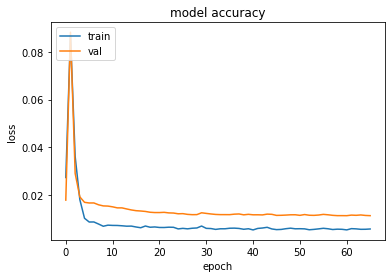

In [30]:
epochs = 70

batch_size = 16

crypto = crypto
execute_test()

Batch size 8

In [ ]:
epochs = 70

batch_size = 8

crypto = crypto
execute_test()

Nos quedaremos con un bacth size de 16. Observamos ligeras mejoras. Con 8 se descontrola algo el aprendizaje. Se vuelve muy lento. Posiblemente se vuelva a probar mas adelante una vez seteados los demas parametros

Probaremos otras activaciones y funcion de perdidas

msle podria funcionar porque los movimientos del mercado son proporcionales al volumen de inversion y precios de la moneda

In [32]:
epochs = 70
batch_size = 32

Loading... BTC
Extracting columns columns for BTC
Proccessing and arranging columns for LSTM model


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
163,16150.03,-2706.22,14902.54,-2392.66,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,...,-3915.06,10799.18,-4120.33,11349.99,-3709.55,11175.27,-5785.12,11089.00,-5980.79,10000.09
164,14902.54,-2392.66,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,...,-4120.33,11349.99,-3709.55,11175.27,-5785.12,11089.00,-5980.79,11491.00,-4659.03,10159.98
165,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,14210.00,710.00,...,-3709.55,11175.27,-5785.12,11089.00,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11039.55
166,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,14210.00,710.00,13474.99,-224.35,...,-5785.12,11089.00,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11251.00,-3149.00,10383.43
167,13238.78,-87.83,13740.01,440.01,14210.00,710.00,13474.99,-224.35,13539.93,-2149.08,...,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11251.00,-3149.00,10237.51,-4669.58,11153.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,50588.95,-9755.92,50471.19,-6420.43,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,...,-7892.18,50838.81,-2762.24,50820.00,1667.53,50399.66,1003.33,50775.49,333.57,43084.29
1594,50471.19,-6420.43,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,...,-2762.24,50820.00,1667.53,50399.66,1003.33,50775.49,333.57,50701.44,112.49,43071.66
1595,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,46702.75,-10838.52,...,1667.53,50399.66,1003.33,50775.49,333.57,50701.44,112.49,47543.74,-2927.45,42201.62
1596,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,46702.75,-10838.52,48343.28,-8795.01,...,1003.33,50775.49,333.57,50701.44,112.49,47543.74,-2927.45,46464.66,-1080.93,42352.12


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
1598,50053.9,-6193.28,46702.75,-10838.52,48343.28,-8795.01,48864.98,-10095.38,47632.38,-6094.15,...,112.49,47543.74,-2927.45,46464.66,-1080.93,47120.87,-19.67,46216.93,-3173.06,41761.89


Input shape: (1435, 1, 40) (1435, 1)
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_55 (LSTM)               (None, 1, 100)            56400     
_________________________________________________________________
lstm_56 (LSTM)               (None, 1, 50)             30200     
_________________________________________________________________
dropout_35 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_57 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_36 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 51        
Total params: 106,851
Trainable params: 106,851
Non-trainable params: 0
__________

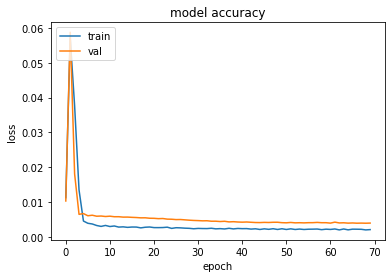

In [39]:
activation = 'relu'
loss = 'msle'
metrics = ['msle']

crypto = crypto
execute_test()

La distribucion de precios se asemeja a una distribucion log normal (right skewed). Por eso esta funcion de periddas funciona mejor

Puede perjudicar a close_diff porque no sigue la misma distribución

De todas formas no dejaremos de lado mse.

Loading... BTC
Extracting columns columns for BTC
Proccessing and arranging columns for LSTM model


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
163,16150.03,-2706.22,14902.54,-2392.66,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,...,-3915.06,10799.18,-4120.33,11349.99,-3709.55,11175.27,-5785.12,11089.00,-5980.79,10000.09
164,14902.54,-2392.66,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,...,-4120.33,11349.99,-3709.55,11175.27,-5785.12,11089.00,-5980.79,11491.00,-4659.03,10159.98
165,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,14210.00,710.00,...,-3709.55,11175.27,-5785.12,11089.00,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11039.55
166,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,14210.00,710.00,13474.99,-224.35,...,-5785.12,11089.00,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11251.00,-3149.00,10383.43
167,13238.78,-87.83,13740.01,440.01,14210.00,710.00,13474.99,-224.35,13539.93,-2149.08,...,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11251.00,-3149.00,10237.51,-4669.58,11153.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,50588.95,-9755.92,50471.19,-6420.43,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,...,-7892.18,50838.81,-2762.24,50820.00,1667.53,50399.66,1003.33,50775.49,333.57,43084.29
1594,50471.19,-6420.43,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,...,-2762.24,50820.00,1667.53,50399.66,1003.33,50775.49,333.57,50701.44,112.49,43071.66
1595,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,46702.75,-10838.52,...,1667.53,50399.66,1003.33,50775.49,333.57,50701.44,112.49,47543.74,-2927.45,42201.62
1596,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,46702.75,-10838.52,48343.28,-8795.01,...,1003.33,50775.49,333.57,50701.44,112.49,47543.74,-2927.45,46464.66,-1080.93,42352.12


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
1598,50053.9,-6193.28,46702.75,-10838.52,48343.28,-8795.01,48864.98,-10095.38,47632.38,-6094.15,...,112.49,47543.74,-2927.45,46464.66,-1080.93,47120.87,-19.67,46216.93,-3173.06,41761.89


Input shape: (1435, 1, 40) (1435, 1)
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_49 (LSTM)               (None, 1, 100)            56400     
_________________________________________________________________
lstm_50 (LSTM)               (None, 1, 50)             30200     
_________________________________________________________________
dropout_31 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_51 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_32 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 51        
Total params: 106,851
Trainable params: 106,851
Non-trainable params: 0
__________

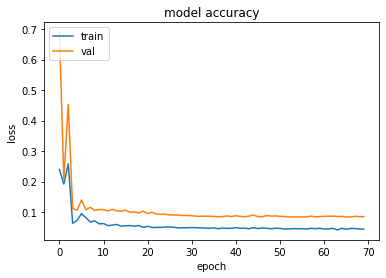

In [34]:
activation = 'relu'
loss = 'mae'
metrics = ['mae']

crypto = crypto
execute_test()

Obtenemos mejores resultados con la funcion de perdidas: msle

Probaremos ahora diferentes activaciones

- Leaky ReLU para evitar dying neurons
- Swish ha demostrado buen comportamiento según algunos papers

In [35]:
loss = 'msle'
metrics = ['msle']

epochs = 70

In [36]:
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K
from keras.layers import Activation
from keras.layers import LeakyReLU

def custom_activation(x, beta = 1):
        return (K.sigmoid(beta * x) * x)

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

Loading... BTC
Extracting columns columns for BTC
Proccessing and arranging columns for LSTM model


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
163,16150.03,-2706.22,14902.54,-2392.66,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,...,-3915.06,10799.18,-4120.33,11349.99,-3709.55,11175.27,-5785.12,11089.00,-5980.79,10000.09
164,14902.54,-2392.66,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,...,-4120.33,11349.99,-3709.55,11175.27,-5785.12,11089.00,-5980.79,11491.00,-4659.03,10159.98
165,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,14210.00,710.00,...,-3709.55,11175.27,-5785.12,11089.00,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11039.55
166,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,14210.00,710.00,13474.99,-224.35,...,-5785.12,11089.00,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11251.00,-3149.00,10383.43
167,13238.78,-87.83,13740.01,440.01,14210.00,710.00,13474.99,-224.35,13539.93,-2149.08,...,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11251.00,-3149.00,10237.51,-4669.58,11153.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,50588.95,-9755.92,50471.19,-6420.43,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,...,-7892.18,50838.81,-2762.24,50820.00,1667.53,50399.66,1003.33,50775.49,333.57,43084.29
1594,50471.19,-6420.43,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,...,-2762.24,50820.00,1667.53,50399.66,1003.33,50775.49,333.57,50701.44,112.49,43071.66
1595,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,46702.75,-10838.52,...,1667.53,50399.66,1003.33,50775.49,333.57,50701.44,112.49,47543.74,-2927.45,42201.62
1596,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,46702.75,-10838.52,48343.28,-8795.01,...,1003.33,50775.49,333.57,50701.44,112.49,47543.74,-2927.45,46464.66,-1080.93,42352.12


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
1598,50053.9,-6193.28,46702.75,-10838.52,48343.28,-8795.01,48864.98,-10095.38,47632.38,-6094.15,...,112.49,47543.74,-2927.45,46464.66,-1080.93,47120.87,-19.67,46216.93,-3173.06,41761.89


Input shape: (1435, 1, 40) (1435, 1)
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 1, 100)            56400     
_________________________________________________________________
lstm_53 (LSTM)               (None, 1, 50)             30200     
_________________________________________________________________
dropout_33 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_54 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_34 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 51        
_________________________________________________________________
leaky_re_lu_1 (L

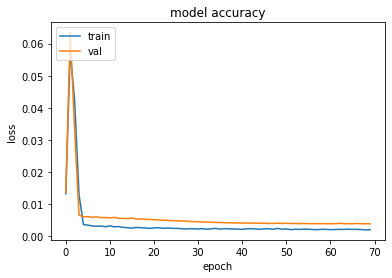

In [37]:
activation = LeakyReLU(alpha=0.05)

crypto = crypto
execute_test()

Loading... BTC
Extracting columns columns for BTC
Proccessing and arranging columns for LSTM model


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
163,16150.03,-2706.22,14902.54,-2392.66,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,...,-3915.06,10799.18,-4120.33,11349.99,-3709.55,11175.27,-5785.12,11089.00,-5980.79,10000.09
164,14902.54,-2392.66,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,...,-4120.33,11349.99,-3709.55,11175.27,-5785.12,11089.00,-5980.79,11491.00,-4659.03,10159.98
165,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,14210.00,710.00,...,-3709.55,11175.27,-5785.12,11089.00,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11039.55
166,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,14210.00,710.00,13474.99,-224.35,...,-5785.12,11089.00,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11251.00,-3149.00,10383.43
167,13238.78,-87.83,13740.01,440.01,14210.00,710.00,13474.99,-224.35,13539.93,-2149.08,...,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11251.00,-3149.00,10237.51,-4669.58,11153.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,50588.95,-9755.92,50471.19,-6420.43,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,...,-7892.18,50838.81,-2762.24,50820.00,1667.53,50399.66,1003.33,50775.49,333.57,43084.29
1594,50471.19,-6420.43,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,...,-2762.24,50820.00,1667.53,50399.66,1003.33,50775.49,333.57,50701.44,112.49,43071.66
1595,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,46702.75,-10838.52,...,1667.53,50399.66,1003.33,50775.49,333.57,50701.44,112.49,47543.74,-2927.45,42201.62
1596,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,46702.75,-10838.52,48343.28,-8795.01,...,1003.33,50775.49,333.57,50701.44,112.49,47543.74,-2927.45,46464.66,-1080.93,42352.12


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
1598,50053.9,-6193.28,46702.75,-10838.52,48343.28,-8795.01,48864.98,-10095.38,47632.38,-6094.15,...,112.49,47543.74,-2927.45,46464.66,-1080.93,47120.87,-19.67,46216.93,-3173.06,41761.89


Input shape: (1435, 1, 40) (1435, 1)
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_58 (LSTM)               (None, 1, 100)            56400     
_________________________________________________________________
lstm_59 (LSTM)               (None, 1, 50)             30200     
_________________________________________________________________
dropout_37 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_60 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_38 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 51        
_________________________________________________________________
Swish (Activatio

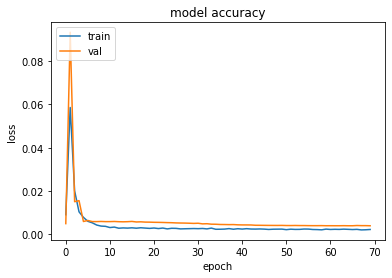

In [40]:
activation = Activation(custom_activation,name = "Swish")

crypto = crypto
execute_test()

Nos quedaremos con activación ReLU

In [41]:
activation = LeakyReLU(alpha=0.05)


Finalmente usaremos la diferencia de precio y el precio pero aumentando a 40 los dias previos usados y bajando a 10 los dias a predecir

In [ ]:
#### PERIODS ####
prev_periods = 40
pred_periods = 10


columns_12 = ['close', 'close_diff_10']
columns = columns_12

for crypto in cryptos:
    crypto = crypto
    execute_test()

Mejora considerable al subir prev peridos y bajar pred periods

Se ha probado a mover el numero de dias previos usados. Parece no afectar mucho al comportamiento del modelo 

Haremos backtesting para probar a añadir varias caracteristicas y sacar como target la diferencia de precio y el precio. Obtendremos mejor resultado una vez aplicado el modelado de red y los hiperparametros mas eficiantes segun hemos analizado?

Caracteristicas a probar:

- Resistance and support levels 50

Target a probar:

- close
- close_diff_10

Cambiaremos a mse porque no vimos mejoras relevantes en la diferencia de precio usando msle.

Se ha probado en este modelado de datos con mse y no ofrece buenos resultados. Se vuelve a mse

In [ ]:
loss = 'mse'
metrics = ['mse']

In [ ]:
target = 'close'

columns_13 = ['Sup 50', 'Res 50', 'close']
columns_14 = ['Sup 50', 'Res 50', 'close_diff_10']

columns = columns_13
num_features = len(columns)

for crypto in cryptos:
    crypto = crypto
    execute_test()

In [ ]:
target = 'close_diff_10'

columns = columns_14
num_features = len(columns)

for crypto in cryptos:
    crypto = crypto
    execute_test()

Seguiremos usando el modelado anterior

Probemos con volumen:

In [ ]:
#### PERIODS ####
prev_periods = 40
pred_periods = 10

#GRU
model_sel = 1

# Cryptos
cryptos = ['ETH']

#### NORM AND FEATURES CONFIGURATION ####
target = 'close'
norm_strat = 2

#### COLUMNS ####
columns_12 = ['close', 'Volume ETH']


#### Hyper params ####

#activations = ['relu', 'sigmoid', 'softmax']
#losses = ['mse', 'binary_crossentropy', 'categorical_crossentropy']
#metrics_opt = ['mse', 'accuracy']
activation = 'relu'
loss = 'msle'
metrics = ['msle']
initial_learning_rate = 0.01

optimizer = optimizers.Adam(learning_rate=0.0005)

callbacks = ['mc', 'es']
batch_size = 32
epochs = 70

layers = 2
neurons = [100, 50, 50]

columns = columns_12
num_features = len(columns)

Por ultimo, antes de probar el modelo GRU haremos una ultima prueba con softmax y la operacion a realizar usando los parametros y modelado ya analizado

In [ ]:
epochs = 70

target = None
columns_11 = ['op_buy', 'op_sell', 'op_hold'] # Usar softmax

columns = columns_11
num_features = len(columns)

activation = 'softmax'
loss = 'categorical_crossentropy'
metrics = ['accuracy', 'categorical_crossentropy']

crypto = 'ETH'

split_indexes = [-7, -9, -15, -19]

for split_index in split_indexes:
    execute_test(split_index)

In [ ]:
for crypto in cryptos:
    crypto = crypto
    execute_test()

No conseguimos buenos resultados. Seguimos sin ser capaces de identificar los puntos de compra y venta

#### GRU

Probaremos el mejor modelado e hiperparametros ya vistos pero con GRU

In [44]:
#### PERIODS ####
prev_periods = 20
pred_periods = 20

#GRU
model_sel = 1

# Cryptos
cryptos = ['ETH', 'ADA', 'BTC', 'LNK', 'LTC']

#### NORM AND FEATURES CONFIGURATION ####
target = 'close'
norm_strat = 2

#### COLUMNS ####
columns_12 = ['close', 'close_diff_20']


#### Hyper params ####

#activations = ['relu', 'sigmoid', 'softmax']
#losses = ['mse', 'binary_crossentropy', 'categorical_crossentropy']
#metrics_opt = ['mse', 'accuracy']
activation = LeakyReLU(alpha=0.05)
loss = 'msle'
metrics = ['msle']
initial_learning_rate = 0.01

optimizer = optimizers.Adam(learning_rate=0.0005)

callbacks = ['mc', 'es']
batch_size = 32
epochs = 70

layers = 2
neurons = [100, 50, 50]

columns = columns_12
num_features = len(columns)

Loading... BTC
Extracting columns columns for BTC
Proccessing and arranging columns for LSTM model


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
163,16150.03,-2706.22,14902.54,-2392.66,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,...,-3915.06,10799.18,-4120.33,11349.99,-3709.55,11175.27,-5785.12,11089.00,-5980.79,10000.09
164,14902.54,-2392.66,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,...,-4120.33,11349.99,-3709.55,11175.27,-5785.12,11089.00,-5980.79,11491.00,-4659.03,10159.98
165,14400.00,-2088.98,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,14210.00,710.00,...,-3709.55,11175.27,-5785.12,11089.00,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11039.55
166,14907.09,-585.55,13238.78,-87.83,13740.01,440.01,14210.00,710.00,13474.99,-224.35,...,-5785.12,11089.00,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11251.00,-3149.00,10383.43
167,13238.78,-87.83,13740.01,440.01,14210.00,710.00,13474.99,-224.35,13539.93,-2149.08,...,-5980.79,11491.00,-4659.03,11879.95,-3022.59,11251.00,-3149.00,10237.51,-4669.58,11153.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,50588.95,-9755.92,50471.19,-6420.43,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,...,-7892.18,50838.81,-2762.24,50820.00,1667.53,50399.66,1003.33,50775.49,333.57,43084.29
1594,50471.19,-6420.43,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,...,-2762.24,50820.00,1667.53,50399.66,1003.33,50775.49,333.57,50701.44,112.49,43071.66
1595,47545.59,-10506.65,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,46702.75,-10838.52,...,1667.53,50399.66,1003.33,50775.49,333.57,50701.44,112.49,47543.74,-2927.45,42201.62
1596,47140.54,-12566.97,49389.99,-9232.03,50053.90,-6193.28,46702.75,-10838.52,48343.28,-8795.01,...,1003.33,50775.49,333.57,50701.44,112.49,47543.74,-2927.45,46464.66,-1080.93,42352.12


,close_19,close_diff_20_19,close_18,close_diff_20_18,close_17,close_diff_20_17,close_16,close_diff_20_16,close_15,close_diff_20_15,...,close_diff_20_4,close_3,close_diff_20_3,close_2,close_diff_20_2,close_1,close_diff_20_1,close_0,close_diff_20_0,close
1598,50053.9,-6193.28,46702.75,-10838.52,48343.28,-8795.01,48864.98,-10095.38,47632.38,-6094.15,...,112.49,47543.74,-2927.45,46464.66,-1080.93,47120.87,-19.67,46216.93,-3173.06,41761.89


Input shape: (1435, 1, 40) (1435, 1)
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 1, 100)            42300     
_________________________________________________________________
gru_5 (GRU)                  (None, 1, 50)             22650     
_________________________________________________________________
dropout_41 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
gru_6 (GRU)                  (None, 50)                15150     
_________________________________________________________________
dropout_42 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 51        
_________________________________________________________________
leaky_re_lu_4 (L

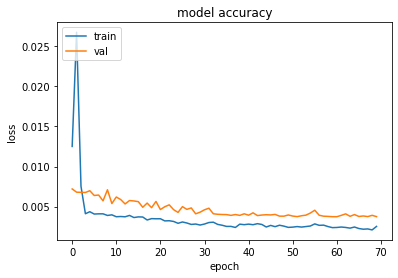

In [45]:
crypto = crypto
execute_test()

#### Final models to use

Despues de todo el analisis usaremos este diccionario de parametros para nuestros modelos. Bajamos aun mas los dias a predecir y los dias previos usados para mayor precisión y rapidez de entrenamiento.

Se ha observaod ademas estancamientos en algunos entrenamiento y para evitarlo hemos cambiado de msle a mse

Se ha probado con diferentes funciones de lr scheduler por no solucionaba el problema.

Otra solucion es obtener mas datos

In [52]:
#### PERIODS ####
prev_periods = 40
pred_periods = 5

#LSTM
model_sel = 1

# Cryptos
cryptos = ['ETH', 'ADA', 'BTC', 'LNK', 'LTC']

#### NORM AND FEATURES CONFIGURATION ####
target = 'close'
norm_strat = 2

#### Hyper params ####
activation = LeakyReLU(alpha=0.05)
loss = 'msle'
metrics = ['msle']
initial_learning_rate = 0.01

optimizer = optimizers.Adam(learning_rate=0.0005)

callbacks = ['mc', 'es']
batch_size = 16
epochs = 70

layers = 2
neurons = [100, 50, 50]

columns = ['RSI', 'ADX', 'close']
num_features = len(columns)

Loading... BTC
Extracting columns columns for BTC
Proccessing and arranging columns for LSTM model


,close_39,ADX_39,RSI_39,close_38,ADX_38,RSI_38,close_37,ADX_37,RSI_37,close_36,...,close_2,ADX_2,RSI_2,close_1,ADX_1,RSI_1,close_0,ADX_0,RSI_0,close
177,13380.00,55.667336,33.988305,14675.11,54.588856,43.409602,14919.51,44.541440,45.004726,15059.54,...,7599.00,50.304212,31.164405,7784.02,50.571974,32.713437,8683.92,50.731941,39.808302,9449.99
178,14675.11,54.588856,43.409602,14919.51,44.541440,45.004726,15059.54,39.574604,45.944867,16960.39,...,7784.02,50.571974,32.713437,8683.92,50.731941,39.808302,8533.98,49.729774,39.069110,10000.09
179,14919.51,44.541440,45.004726,15059.54,39.574604,45.944867,16960.39,36.632306,56.752693,17069.79,...,8683.92,50.731941,39.808302,8533.98,49.729774,39.069110,8063.88,48.444698,36.764139,10159.98
180,15059.54,39.574604,45.944867,16960.39,36.632306,56.752693,17069.79,29.774929,57.282071,16150.03,...,8533.98,49.729774,39.069110,8063.88,48.444698,36.764139,8903.00,47.447901,43.205221,11039.55
181,16960.39,36.632306,56.752693,17069.79,29.774929,57.282071,16150.03,24.962937,51.567014,14902.54,...,8063.88,48.444698,36.764139,8903.00,47.447901,43.205221,8539.90,46.009643,41.247375,10383.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1608,56480.34,20.055789,44.283082,53601.05,19.681954,38.415831,49152.47,20.522635,31.476679,49396.33,...,41679.74,34.682549,29.550724,41864.62,36.062684,30.496427,41822.49,37.005191,30.396292,43084.29
1609,53601.05,19.681954,38.415831,49152.47,20.522635,31.476679,49396.33,22.878406,32.199668,50441.92,...,41864.62,36.062684,30.496427,41822.49,37.005191,30.396292,42729.29,38.204257,35.319142,43071.66
1610,49152.47,20.522635,31.476679,49396.33,22.878406,32.199668,50441.92,25.036301,35.349386,50588.95,...,41822.49,37.005191,30.396292,42729.29,38.204257,35.319142,43902.66,38.629996,41.122043,42201.62
1611,49396.33,22.878406,32.199668,50441.92,25.036301,35.349386,50588.95,26.624459,35.801031,50471.19,...,42729.29,38.204257,35.319142,43902.66,38.629996,41.122043,42560.11,38.192198,37.028616,42352.12


,close_39,ADX_39,RSI_39,close_38,ADX_38,RSI_38,close_37,ADX_37,RSI_37,close_36,...,close_2,ADX_2,RSI_2,close_1,ADX_1,RSI_1,close_0,ADX_0,RSI_0,close
1613,50588.95,26.624459,35.801031,50471.19,27.717067,35.5866,47545.59,28.966559,30.671535,47140.54,...,42560.11,38.192198,37.028616,43059.96,37.73131,39.445484,43084.29,37.486625,39.567066,41761.89


Input shape: (1436, 1, 120) (1436, 1)
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_14 (GRU)                 (None, 1, 100)            66300     
_________________________________________________________________
gru_15 (GRU)                 (None, 1, 50)             22650     
_________________________________________________________________
dropout_47 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
gru_16 (GRU)                 (None, 50)                15150     
_________________________________________________________________
dropout_48 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 51        
_________________________________________________________________
leaky_re_lu_8 (

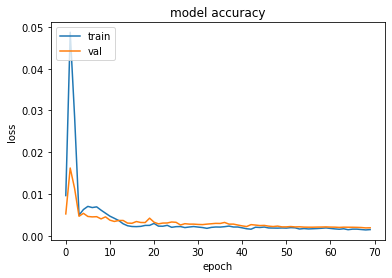

In [53]:
crypto = crypto
execute_test()

Hemos probado con un dataset mas grande y vemos una precisión considerablemente más alta

## Complete simulation

Complete strategy definition. Let the machine work through all the dataset

In [2]:
#### PERIODS ####
prev_periods = 20
pred_periods = 5

#LSTM
model_sel = 0

# Cryptos
crypto = 'BTC'

#### NORM AND FEATURES CONFIGURATION ####
target = 'close'
norm_strat = 2

#### Hyper params ####
activation = LeakyReLU(alpha=0.05)
loss = 'msle'
metrics = ['msle']
initial_learning_rate = 0.01

optimizer = optimizers.Adam(learning_rate=0.001)

callbacks = ['mc', 'es']
batch_size = 32
epochs = 70

layers = 2
neurons = [100, 50, 50]

columns = ['RSI', 'ADX', 'close']
num_features = len(columns)

In [3]:
sim = DLSimulator(crypto, prev_periods, pred_periods, columns, target,
    norm_strat, model_sel, layers, neurons, batch_size, epochs, 
    activation, loss, metrics, optimizer, initial_learning_rate, callbacks)

Loading... BTC
Extracting columns columns for BTC
Proccessing and arranging columns for LSTM model


In [4]:
pred_values = sim.simulate()

Simulation starting...
INDEX: 1399
CLOSE: 40144.04
MODE: buy
TRAINING MODEL:
Input shape: (1399, 1, 60) (1399, 1)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 100)            64400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 50)             30200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
______

In [5]:
import numpy as np

df_predict = pd.DataFrame(np.reshape(pred_values[1], (31)), columns = ['close_pred'])
df_real = sim.df.iloc[1399:1399+31,-1:]
df_real.reset_index(drop=True, inplace=True)

df = pd.concat([df_predict, df_real], ignore_index=False, sort=False, axis=1)
df

,close_pred,close
0,57974.351188,57138.29
1,55564.038729,58960.36
2,56290.418091,53726.53
3,53537.650918,54721.03
4,53961.009954,57274.88
5,2935.888443,57776.25
6,3058.911371,56950.56
7,3011.524913,57184.07
8,53225.556888,56480.34
9,53243.777132,53601.05


In [6]:
rmse = ((df.close - df.close_pred) ** 2).mean() ** .5
rmse

28678.803088375847

In [7]:
mean = (df.close).mean()
mean_rel_diff = rmse/mean
mean_rel_diff

0.5608269987003833

<AxesSubplot:>

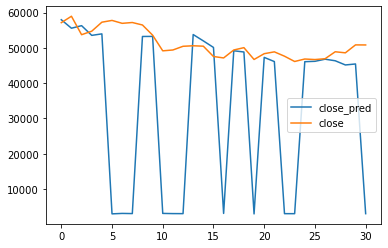

In [8]:
df.plot()